<a href="https://colab.research.google.com/github/pranitatiwari29/Credit_card_default_prediction/blob/main/Final_group(Credit_Card_Default_Prediction_ipyn)b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**  Dharmendra Yadav
##### **Team Member 2 -**  Pranita Tiwari
##### **Team Member 3 -**  Kratika Jawariya

# **Project Summary**

This project revolves around the crucial task of predicting credit card payment defaults among customers in Taiwan. Rather than focusing solely on binary classification (credibility or not), our primary objective is to estimate the probability of default, which offers deeper insights into risk assessment. The dataset used encompasses 23 explanatory variables, including credit amount, gender, education, marital status, age, and extensive payment history, with the ultimate goal of developing a predictive model that can effectively identify customers at risk of defaulting on their credit card payments.

**Data Overview:**

The dataset at the core of this project consists of a binary response variable, "Default Payment," where 1 indicates a default, and 0 signifies no default. It's paired with a comprehensive set of explanatory variables. These variables encompass a wide range of aspects, such as the credit amount extended, gender of the cardholder, their educational background, marital status, age, and the history of past payments over several months. Additionally, it includes data on bill statement amounts and previous payment amounts, providing a holistic view of each customer's financial behavior.


**Business Objective:**

The primary aim of this project is to develop a robust predictive model capable of identifying customers who are likely to default on their credit card payments in the upcoming months. Credit card default, in this context, refers to the scenario where individuals consistently fail to pay the Minimum Amount Due for consecutive months. By predicting potential defaults proactively, our objective is to empower credit card companies with the tools to make informed decisions. This, in turn, can significantly reduce the incidence of defaults and facilitate targeted engagement with low-risk customer segments.

**Exploratory Data Analysis**

Exploratory Data Analysis (EDA) in credit card default prediction uncovers valuable insights for business improvement. It reveals default rate patterns, guides the setting of optimal credit limits, and assists in tailoring risk management strategies. EDA also explores correlations between factors like age, income, and education levels with default rates, aiding in product design and risk assessment. Additionally, it can identify effective feature engineering techniques, improve data balance, and enhance outlier detection. These insights enable businesses to refine their prediction models, boost risk management practices, and optimize customer engagement, ultimately leading to improved financial stability and customer satisfaction.

**Feature Engineering:**

Several crucial feature engineering steps were undertaken to enhance the dataset's predictive power. To address data imbalance, techniques were employed to ensure that default and non-default cases were appropriately represented. Additionally, binning was applied to certain variables for improved modeling. To standardize the data and bring it to a common scale, the StandardScaler was utilized. Finally, the dataset was divided into distinct training and testing sets, facilitating the evaluation and validation of predictive models.

**Model Building:**

A variety of machine learning models were explored for credit card default prediction. We implemented models such as Support Vector Classifier (SVC), K-Nearest Neighbors (KNN), Random Forest, and XGBoost. Model selection was based on performance, interpretability, and generalization.

**Evaluation:**

The evaluation phase involved assessing model performance using relevant metrics such as accuracy, precision, recall, and the Receiver Operating Characteristic - Area Under the Curve (ROC-AUC). This allowed us to understand the models' abilities to predict default cases accurately.

**In conclusion,** this project addresses a significant concern within the credit card industry. It provides insights and tools that can help manage credit card default risk effectively, resulting in improved financial outcomes and operational efficiency. By predicting and proactively addressing defaults, credit card companies can navigate the challenges of risk management more effectively and offer better services to their customers.






# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This project is dedicated to forecasting customer payment defaults in Taiwan. From a risk management viewpoint, the precision of predicting the probability of default holds greater significance than simply categorizing clients as either credible or not. We can employ the K-S chart to assess which customers are likely to experience credit card payment defaults.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Importing the dataset
df = pd.read_excel('/content/drive/MyDrive/Dataset/default of credit card clients.xls')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(30000, 25)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

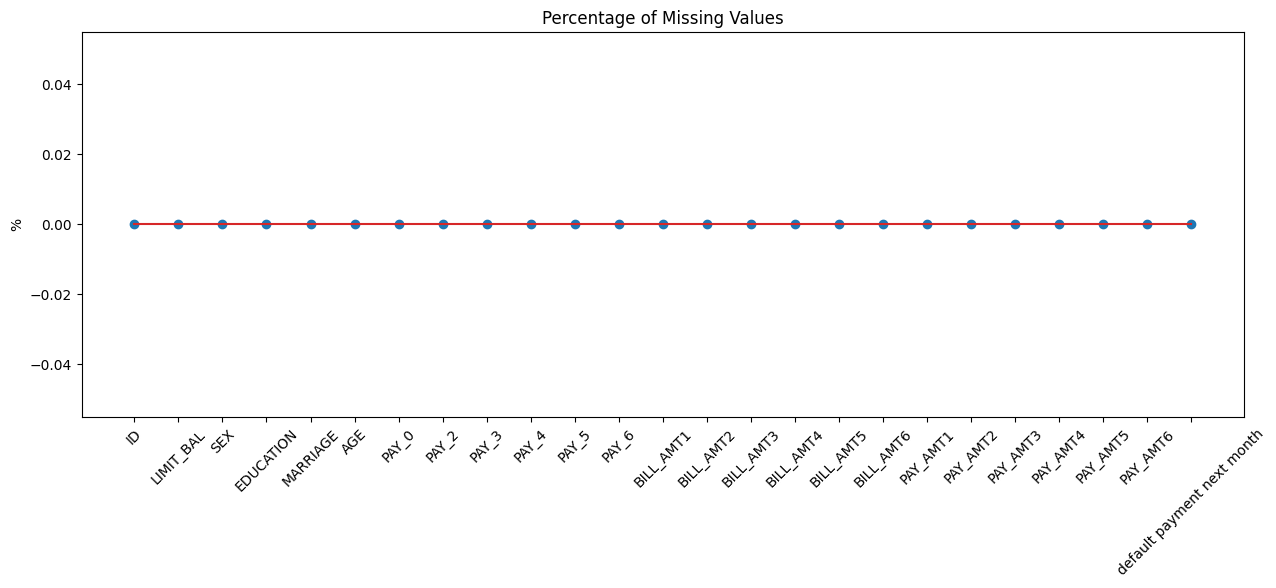

In [ ]:
# Visualizing the missing values
missing_values_per = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index()
plt.figure(figsize=(15,5))
plt.stem(missing_values_per['index'],missing_values_per[0])
plt.xticks(rotation=45,fontsize=10)
plt.title('Percentage of Missing Values')
plt.ylabel('%')
plt.show()

### What did you know about your dataset?

There are 4 object type variables which need to be converted to numerical data type for applying a machine learning algorithm. Additionally, it's worth noting that all columns have no missing values, and the dataset comprises 30,000 rows and 25 columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Variables Description

**Breakdown of Our Features:**

We possess data for 30,000 customers, and the following describes all the available features.


**ID:** ID of each client


**LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit)


**SEX:** Gender (1 = male, 2 = female)


**EDUCATION:** (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)


**MARRIAGE:** Marital status (0 = others, 1 = married, 2 = single, 3 = others)


**AGE:** Age in years


**Scale for PAY_0 to PAY_6 :**


(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)


**PAY_0:** Repayment status in September, 2005 (scale same as above)


**PAY_2:** Repayment status in August, 2005 (scale same as above)


**PAY_3:** Repayment status in July, 2005 (scale same as above)


**PAY_4:** Repayment status in June, 2005 (scale same as above)


**PAY_5:** Repayment status in May, 2005 (scale same as above)


**PAY_6:** Repayment status in April, 2005 (scale same as above)


**BILL_AMT1:**  Amount of bill statement in September, 2005 (NT dollar)


**BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)


**BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)


**BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)


**BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)


**BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)


**PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)


**PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)


**PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)


**PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)


**PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)


**PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)


**default.payment.next.month:** Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Rename the columns

df = df.rename(columns={'default payment next month': 'DEFAULT_PAYMENT','PAY_0': 'PAY_1'})
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [ ]:
# Creating a list of categorical independent variable

independent_variable = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']

In [ ]:
# Value counts of the variable "independent_variable" #  (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

for col in independent_variable:
  print(df[col].value_counts())

2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64


In [ ]:
# Replacing the value as according to feature description
df["EDUCATION"] = df["EDUCATION"].replace({0:4,5:4,6:4})
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})

In [ ]:
# Value counts after replacing of "EDUCATION", "MARRIAGE"
print(df['EDUCATION'].value_counts())
print(df['MARRIAGE'].value_counts())

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


### What all manipulations have you done and insights you found?

 Renaming  the 'default payment next month' column to 'DEFAULT_PAYMENT' and the 'PAY_0' column to 'PAY_1'.

 we've created a list called independent_variable containing the names of columns that we want to consider as independent variables in your analysis. These columns include 'SEX', 'EDUCATION', 'MARRIAGE', and 'AGE'. we can use this list to subset our DataFrame or perform various analyses with these specific columns.

  We examine the distribution of unique values within each of the independent variables ('SEX', 'EDUCATION', 'MARRIAGE', 'AGE') by printing out the counts of each unique value in each column. It can be useful for understanding the distribution of categorical variables and the range of values in numerical variables.

  Next we did data preprocessing on a DataFrame, focusing on the 'EDUCATION' and 'MARRIAGE' columns. It replaces specific values in these columns as follows: it replaces 0, 5, and 6 in the 'EDUCATION' column with 4, and it replaces 0 in the 'MARRIAGE' column with 3. These replacements aim to clean and standardize the data for further analysis. After the replacements, the code prints the updated value counts for both columns, providing a concise summary of the distribution of values in each column post-processing. This data preprocessing step ensures that the data aligns with the intended analysis or modeling by handling and recoding certain values as needed.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

0    23364
1     6636
Name: DEFAULT_PAYMENT, dtype: int64


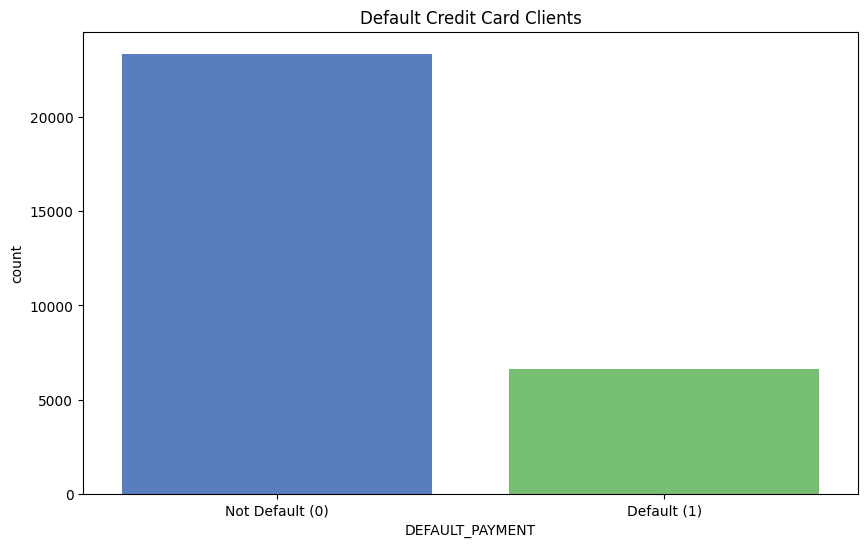

In [ ]:
# Chart - 1 visualization code
leg = ['Not Default (0)', 'Default (1)']
# plotting value counts of dependent variable
print(df['DEFAULT_PAYMENT'].value_counts())

plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-muted')
sns.countplot(x = 'DEFAULT_PAYMENT', data = df)
plt.title('Default Credit Card Clients')  # \n (Default = 1, Not Default = 0)
plt.xticks(range(len(leg)), leg)
plt.show()

##### 1. Why did you pick the specific chart?

Count plot  is suitable for visualizing the distribution of categorical data.

##### 2. What is/are the insight(s) found from the chart?

It can be observed that there is an imbalance in the dataset regarding default and non-default cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of default and non-default cases is crucial for credit card companies as it can help in risk assessment.

#### Chart - 2

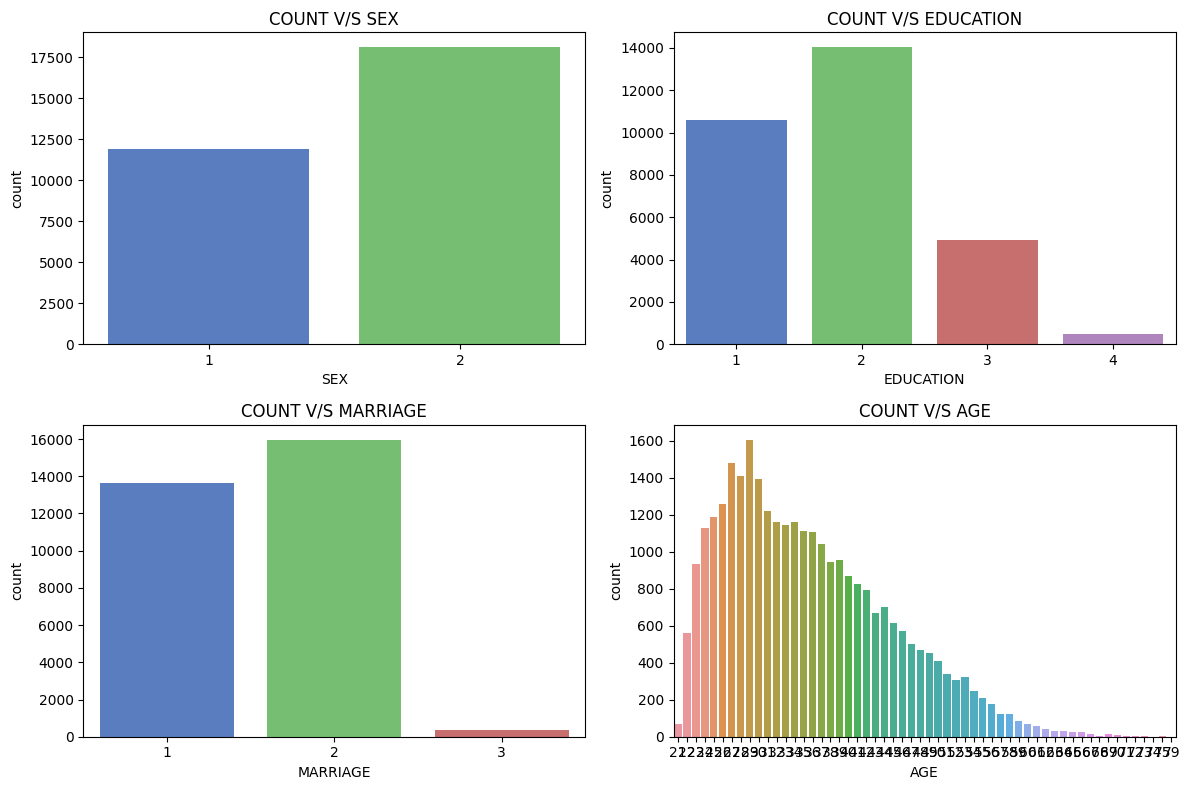

In [ ]:
# Chart - 2 visualization code

# Plotting the countplot graph for "independent_variable"
plt.figure(figsize=(12, 8))
rows=2
cols=2
counter=1

for col in independent_variable:
  plt.subplot(rows,cols,counter)
  sns.countplot(x = col, data= df)
  plt.title(f'COUNT V/S {col}')
  counter=counter+1
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Count plot is suitable for visualizing the distribution of categorical data

##### 2. What is/are the insight(s) found from the chart?

**'SEX',** it's evident that there are more female clients (coded as 2) than male clients (coded as 1) in the dataset.

**'EDUCATION',** count plot reveals that the majority of clients have either a university education (coded as 2) or a graduate school education (coded as 1), with a smaller number having a high school education (coded as 3). The category "others" (coded as 4) also exists.

**'MARRIAGE',**count plot, it appears that the majority of clients are either single (coded as 2) or married (coded as 1), while the category "others" (coded as 3) has a smaller count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the gender distribution can help tailor marketing and product offerings to specific gender demographics.

Understanding the educational background of clients can be useful for customizing financial products and services to cater to different educational levels.

Marital status information can be used for targeted promotions and services for married and single clients.

#### Chart - 3

<Axes: xlabel='DEFAULT_PAYMENT', ylabel='AGE'>

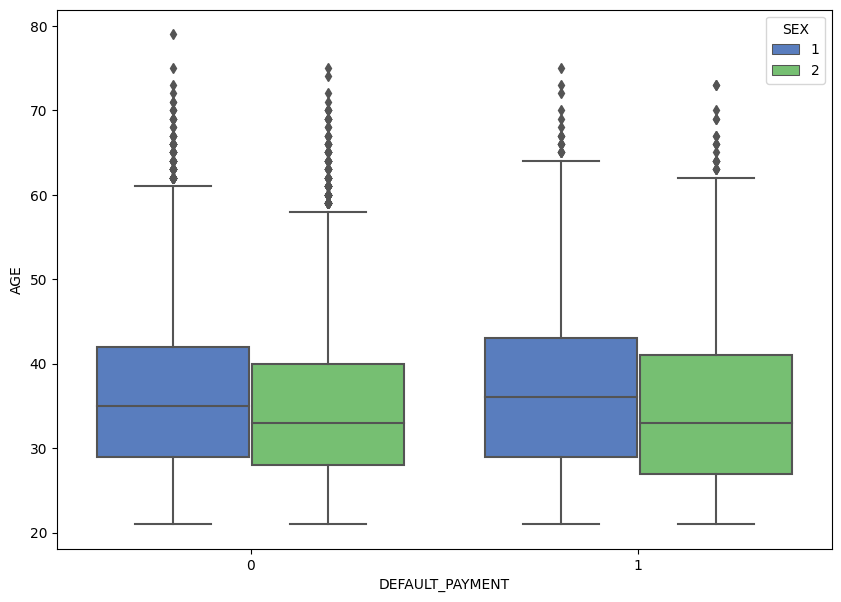

In [ ]:
# Chart - 3 visualization code
# Creating a box plot of AGE V/S DEFAULT_PAYMENT with respect to sex
plt.figure(figsize=(10,7))
sns.boxplot(x='DEFAULT_PAYMENT',hue='SEX', y='AGE',data=df)

##### 1. Why did you pick the specific chart?

A box plot is chosen for this analysis because it provides a clear representation of the distribution of 'AGE' for different categories ('DEFAULT_PAYMENT' and 'SEX') and allows for the comparison of central tendencies and spreads.

##### 2. What is/are the insight(s) found from the chart?

**For clients who did not default (DEFAULT_PAYMENT = 0)**, the box plot shows that the median age is fairly similar for both genders (male and female). There are some outliers on the older side for both genders.

**For clients who defaulted (DEFAULT_PAYMENT = 1)**, the box plot indicates that the median age for both genders is lower than for non-default clients. Again, there are outliers on the older side, but the majority of default cases seem to occur among younger clients.

The use of 'SEX' as a hue parameter allows for a gender-based comparison within each category. It appears that the age distribution for both genders is similar within the 'DEFAULT_PAYMENT' categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The age distribution differences between default and non-default clients can be considered when setting credit limits or interest rates.

Understanding that defaults are more prevalent among younger clients can lead to targeted financial education or risk management strategies for this demographic.

The gender-based analysis within each category can inform marketing and product strategies tailored to specific age and gender groups.

#### Chart - 4

<Axes: xlabel='DEFAULT_PAYMENT', ylabel='AGE'>

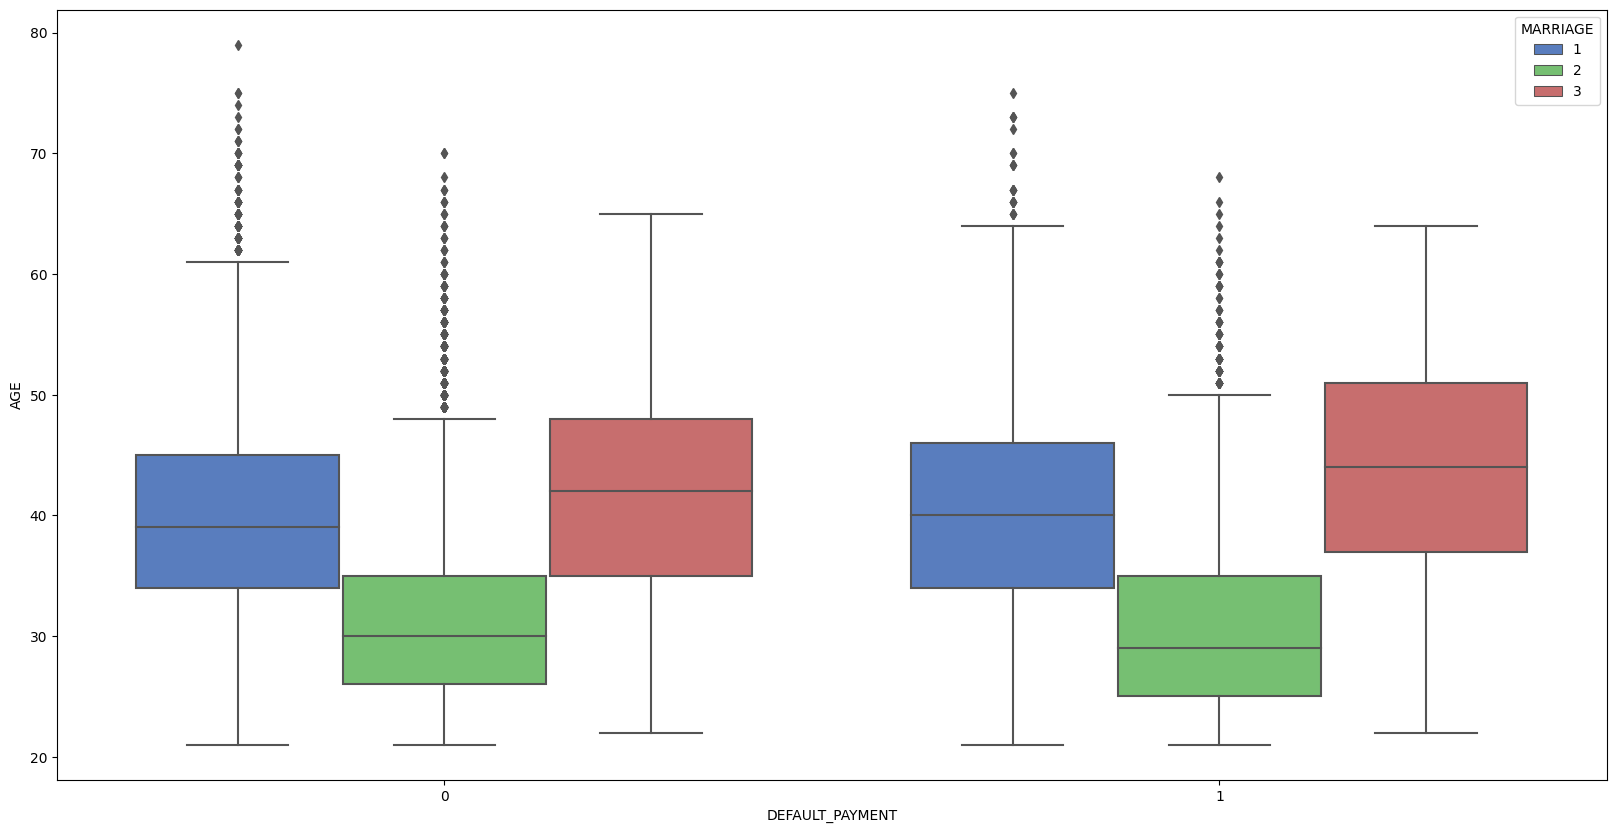

In [ ]:
# Chart - 4 visualization code
# Creating a box plot of AGE V/S DEFAULT_PAYMENT with respect to marriage
plt.figure(figsize=(20,10))
sns.boxplot(x='DEFAULT_PAYMENT',hue='MARRIAGE', y='AGE',data=df)

##### 1. Why did you pick the specific chart?

Its appropriate choice because it allows for the comparison of age distributions across different combinations of 'DEFAULT_PAYMENT' and 'MARRIAGE' categories. It effectively displays central tendencies and spread of age data.

##### 2. What is/are the insight(s) found from the chart?

**Clients who did not default (DEFAULT_PAYMENT = 0):**

For clients who are single (MARRIAGE = 2), the median age appears to be relatively lower

For married clients (MARRIAGE = 1), the median age seems slightly higher compared to single clients within this group.

There are some outliers on both the lower and higher age sides for both marital status categories within the 'not default' group.

**Clients who defaulted (DEFAULT_PAYMENT = 1):**

The median age for both single and married clients within this group appears to be lower compared to the 'not default' group.

There are outliers on both the lower and higher age sides, indicating that default cases include clients across a wider age range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that default cases span a wider age range suggests that age alone may not be a strong predictor of default.


Marital status may have some influence, as seen in the slight differences in median age between single and married clients within each category.

These insights can contribute to more informed credit risk assessment and targeted strategies.

#### Chart - 5

<Axes: xlabel='DEFAULT_PAYMENT', ylabel='AGE'>

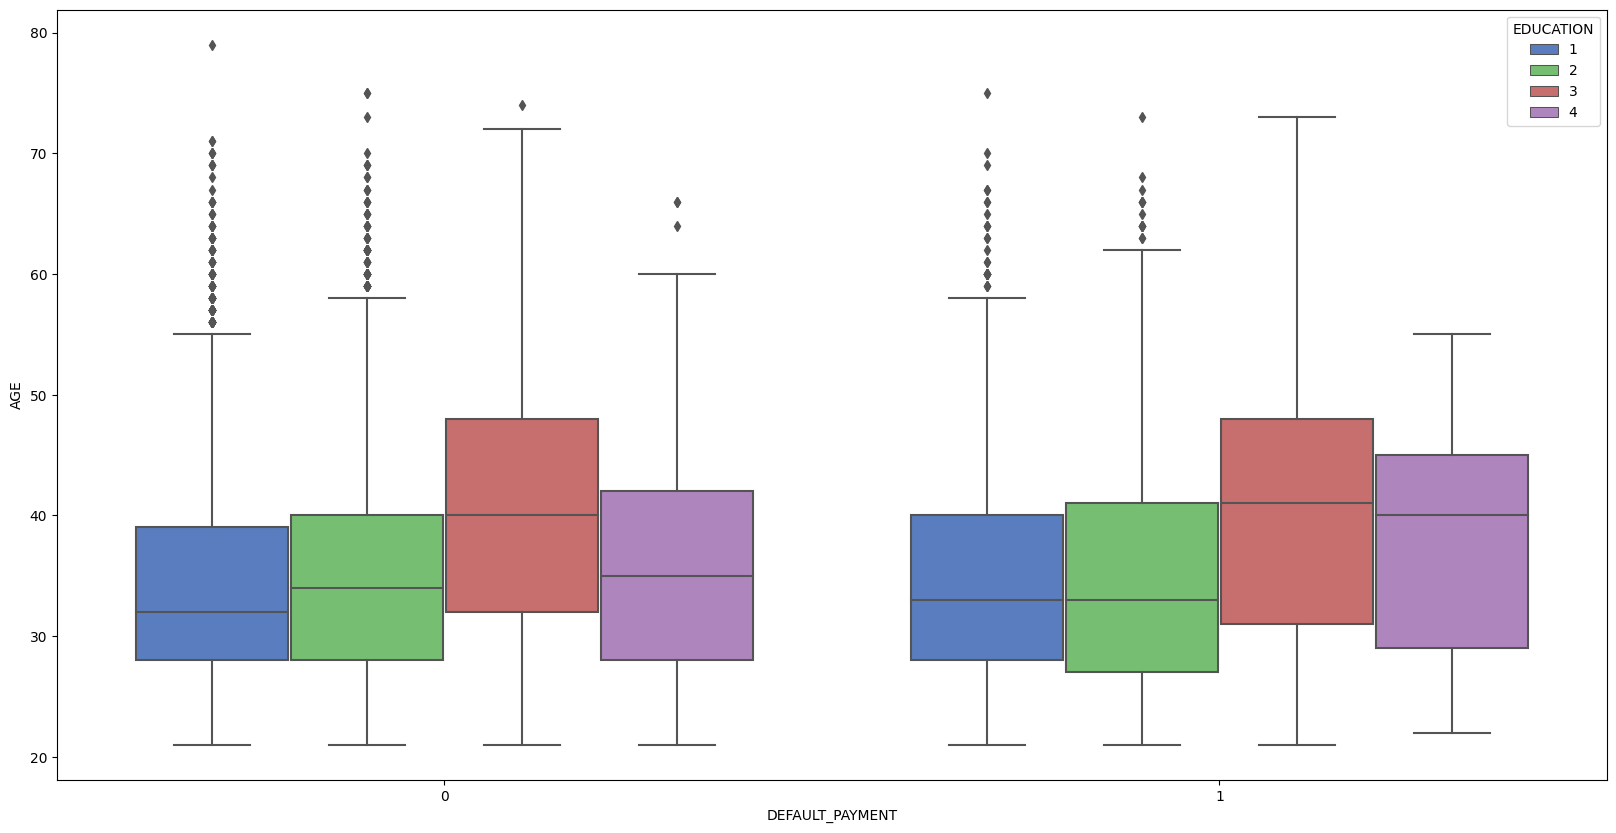

In [ ]:
# Chart - 5 visualization code
# Creating a box plot of AGE V/S DEFAULT_PAYMENT with respect to education
plt.figure(figsize=(20,10))
sns.boxplot(x='DEFAULT_PAYMENT',hue='EDUCATION', y='AGE',data=df)

##### 1. Why did you pick the specific chart?

To visualize the relationship between 'AGE' and 'DEFAULT_PAYMENT' with respect to 'EDUCATION' levels

##### 2. What is/are the insight(s) found from the chart?

**Clients who did not default (DEFAULT_PAYMENT = 0):**

Among clients with a graduate school education (EDUCATION = 1), the median age appears to be relatively higher compared to other education levels within this 'not default' group.

Clients with a university education (EDUCATION = 2) also show a slightly higher median age compared to high school-educated clients (EDUCATION = 3) in the 'not default' group.

There are some outliers on both the lower and higher age sides for different education level categories within the 'not default' group, indicating the presence of clients with exceptional ages.

**Clients who defaulted (DEFAULT_PAYMENT = 1):**

The median age for clients with a high school education (EDUCATION = 3) within this group appears to be relatively lower compared to other education levels.
Graduate school (EDUCATION = 1) and university-educated (EDUCATION = 2) clients who defaulted have a slightly higher median age than high school-educated clients.

Similar to the 'not default' group, there are outliers on both the lower and higher age sides for various education level categories within the 'default' group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can be valuable for risk assessment and business strategies, especially when combined with additional factors and analyses for a comprehensive understanding of credit risk.

#### Chart - 6

In [ ]:
# Creating a function to get columnn names in the given range.
def getColumnsNames(prefix):
  '''
  This function is used for columnn names in the given range.
  '''
  return [prefix+str(x) for x in range(1,7)]

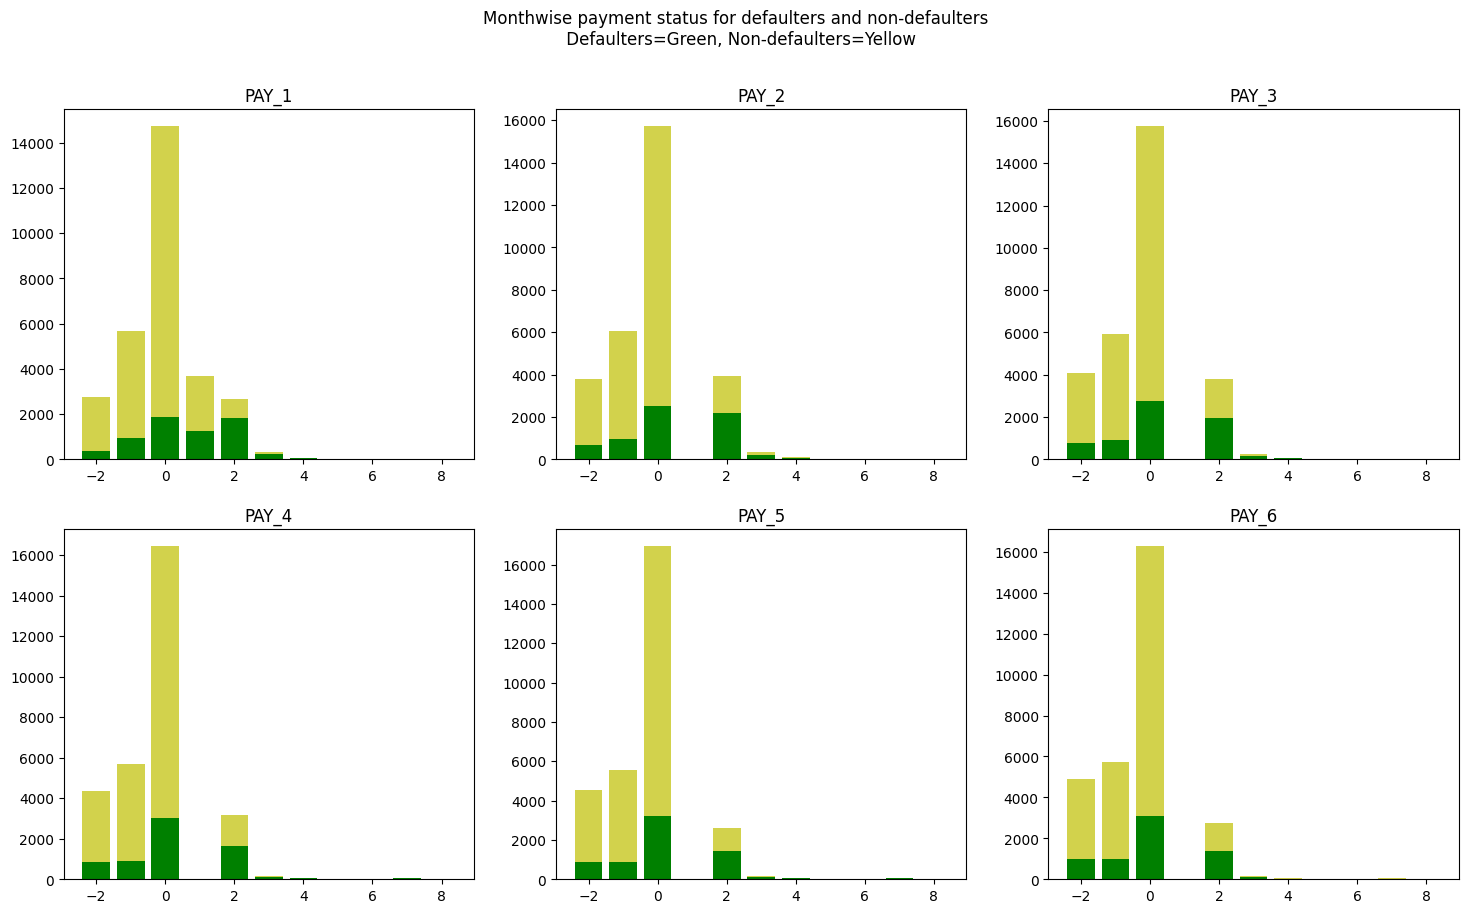

In [ ]:
# Chart - 6 visualization code
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,10)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['DEFAULT_PAYMENT']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='y',alpha = 0.7)
    ax[row,col].bar(x.index, x, align='center', color='g')
    ax[row,col].set_title(pay_status_columns[i])
    plt.suptitle("Monthwise payment status for defaulters and non-defaulters \n Defaulters=Green, Non-defaulters=Yellow")

##### 1. Why did you pick the specific chart?

This choice of chart is appropriate because it allows for a clear comparison of payment statuses over time and highlights any differences between defaulters and non-defaulters.

##### 2. What is/are the insight(s) found from the chart?

**Payment Status (PAY_1 to PAY_6)**:  Each bar chart represents the payment status for a specific month, with different payment delay categories (ranging from -2 to 9) on the x-axis and the frequency of clients on the y-axis.

**Defaulters (Green):** For each month, the green bars represent the payment status distribution of clients who defaulted (DEFAULT_PAYMENT = 1).

**Non-defaulters (Yellow):** The yellow bars indicate the payment status distribution of clients who did not default (DEFAULT_PAYMENT = 0).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Across all months, there is a consistent pattern where clients who did not default (yellow bars) tend to have a higher frequency of on-time payments (indicated by values -2, -1, and 0) compared to clients who defaulted (green bars).

Clients who defaulted show a higher frequency of payment delays, especially for values 1, 2, and 3, which represent payment delays of one, two, and three months, respectively.

In general, as the months progress (from 'PAY_1' to 'PAY_6'), the payment statuses for both defaulters and non-defaulters tend to improve, with a decreasing frequency of delays.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

ax[row, col].set_yscale('log')

def plot_graph(prefix):
  pay_columns = getColumnsNames(prefix)
  figure, ax = plt.subplots(3,2)
  figure.set_size_inches(18,10)
  for i in range(len(pay_columns)):
    row,col =  i%3, int(i/3)

    ax[row,col].hist(df[pay_columns[i]], 30, color='y', alpha=0.7)
    ax[row,col].hist(df[pay_columns[i]][(df['DEFAULT_PAYMENT']==1)], 30, color='g')
    ax[row,col].set_title(pay_columns[i])
    plt.suptitle(f"Monthwise {prefix} distribution for defaulters and non-defaulters \n Defaulters=Green, Non-defaulters=Yellow")
    ax[row,col].set_yscale('log')  # Corrected line to set y-axis to a logarithmic scale


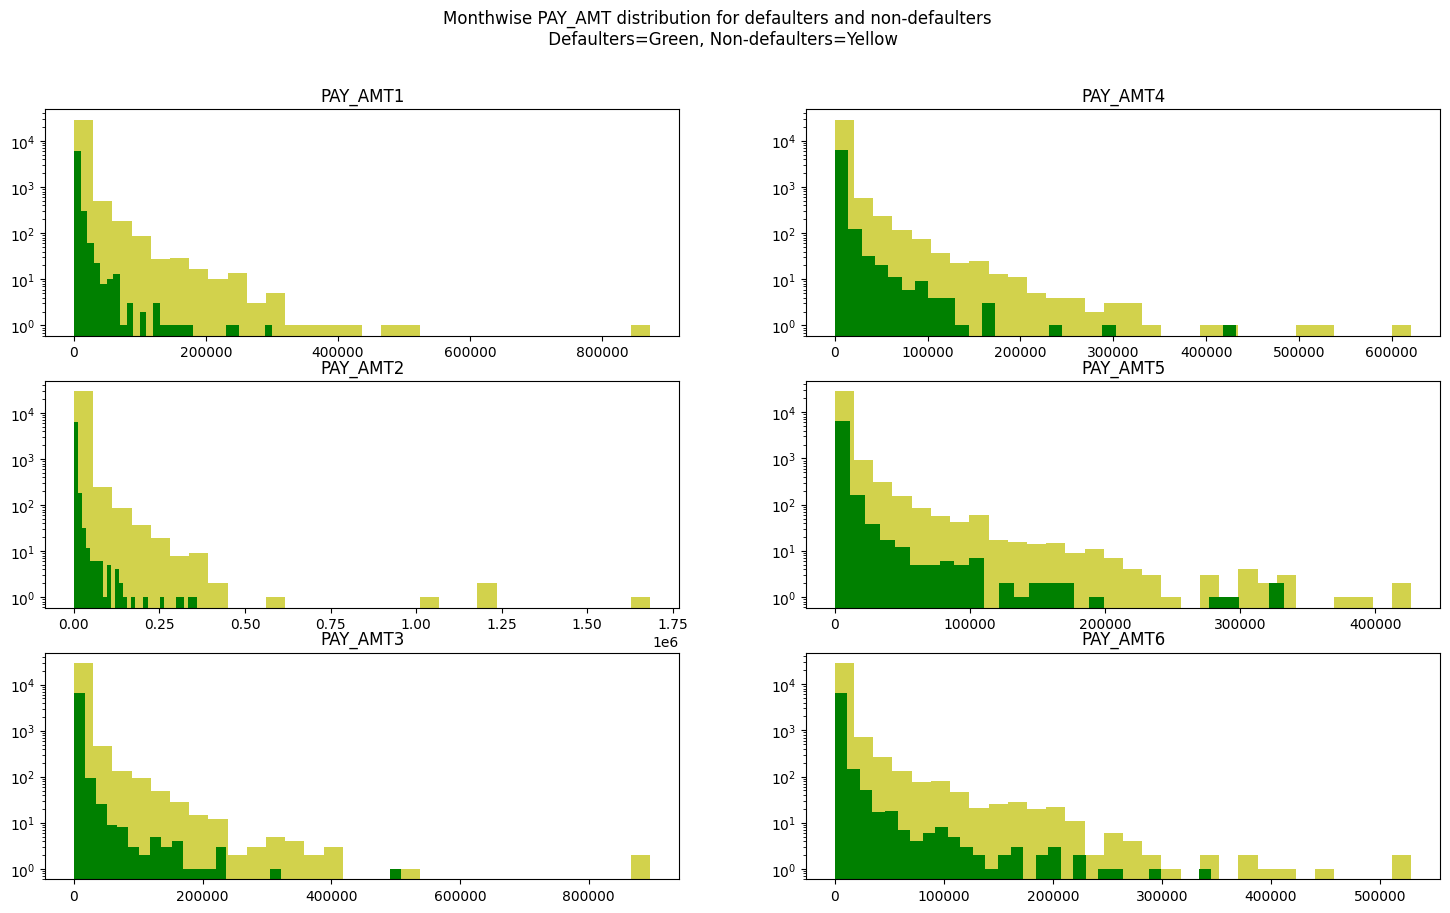

In [ ]:
plot_graph('PAY_AMT')

##### 1. Why did you pick the specific chart?

Histograms are chosen because they allow for a clear representation of the distribution of payment amounts, making it possible to compare the distribution shapes between the two groups.

##### 2. What is/are the insight(s) found from the chart?

**Payment Amounts (PAY_AMT1 to PAY_AMT6):** Each histogram represents the distribution of payment amounts for a specific month, with the x-axis indicating payment amounts and the y-axis representing the frequency or count of clients.

**Defaulters (Green):** The green histograms represent the payment amount distribution for clients who defaulted (DEFAULT_PAYMENT = 1).

**Non-defaulters (Yellow):**The yellow histograms indicate the payment amount distribution for clients who did not default (DEFAULT_PAYMENT = 0).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Across all months,** it's evident that the majority of clients, both defaulters and non-defaulters, tend to make lower payment amounts. This is evident from the high peaks on the left side of each histogram.

While the distributions for both groups (defaulters and non-defaulters) have similar shapes, it appears that defaulters have a slightly higher frequency of lower payment amounts compared to non-defaulters.

In some months, defaulters have a noticeable peak at very low payment amounts, indicating a higher frequency of clients making minimal payments before defaulting.

#### Chart - 8

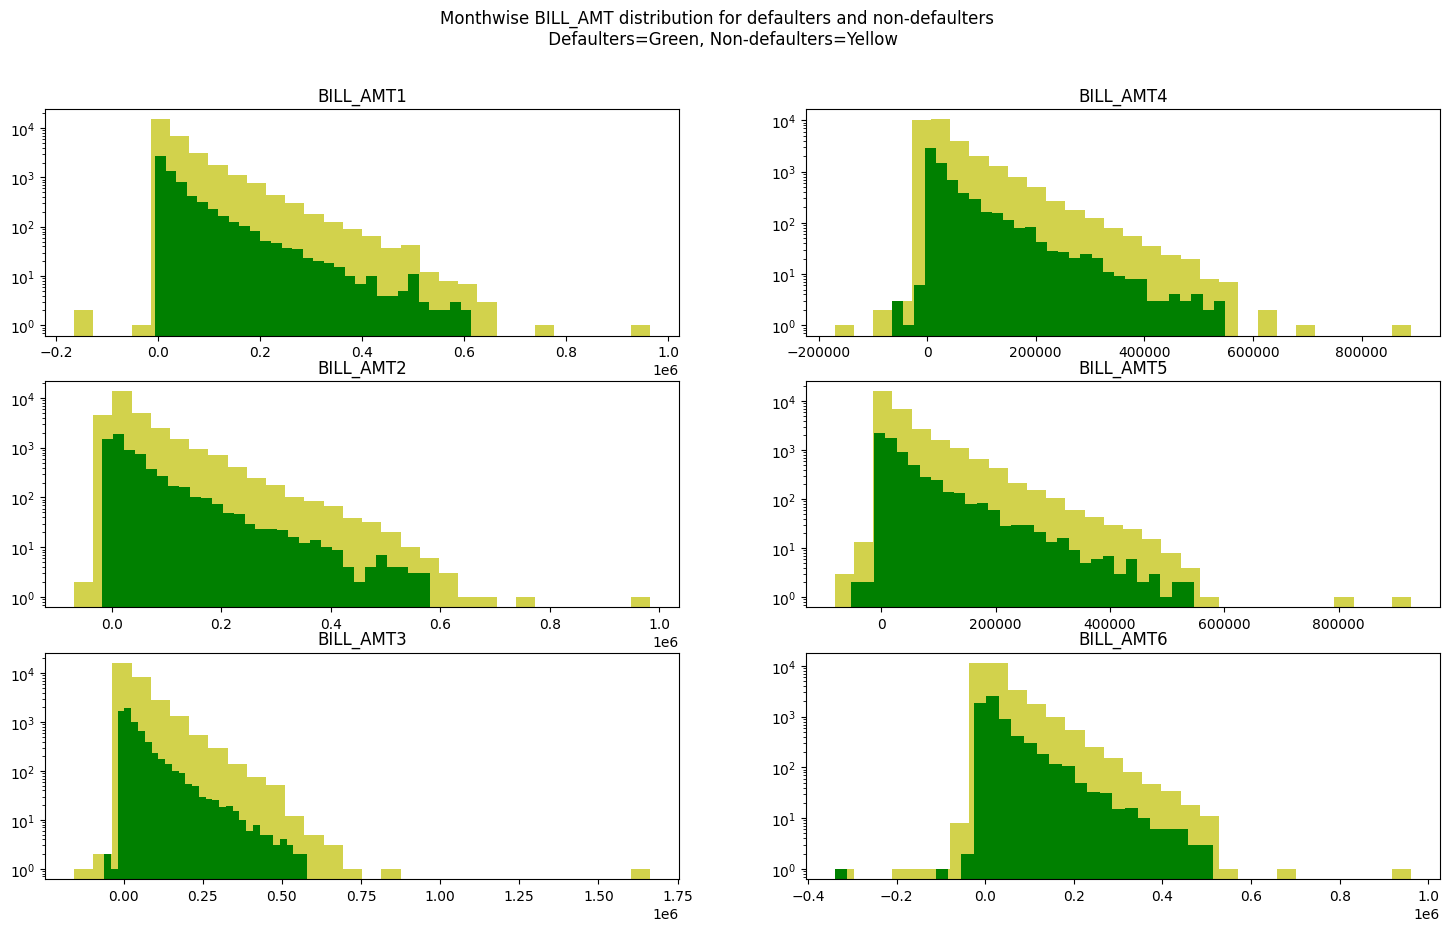

In [ ]:
# Chart - 8 visualization code
plot_graph('BILL_AMT')

##### 1. Why did you pick the specific chart?

It allow for a clear representation of the distribution of payment amounts, making it possible to compare the distribution shapes between the two groups.

##### 2. What is/are the insight(s) found from the chart?

**Payment Amounts (PAY_AMT1 to PAY_AMT6):**Each histogram represents the distribution of payment amounts for a specific month, with the x-axis indicating payment amounts and the y-axis representing the frequency or count of clients.

**Defaulters (Green):** The Green histograms represent the payment amount distribution for clients who defaulted (DEFAULT_PAYMENT = 1).

**Non-defaulters (Yellow):** The yellow histograms indicate the payment amount distribution for clients who did not default (DEFAULT_PAYMENT = 0).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The distributions for both groups (defaulters and non-defaulters) have similar shapes, it appears that defaulters have a slightly higher frequency of lower payment amounts compared to non-defaulters.



#### Chart - 9

<Axes: xlabel='LIMIT_BAL', ylabel='Density'>

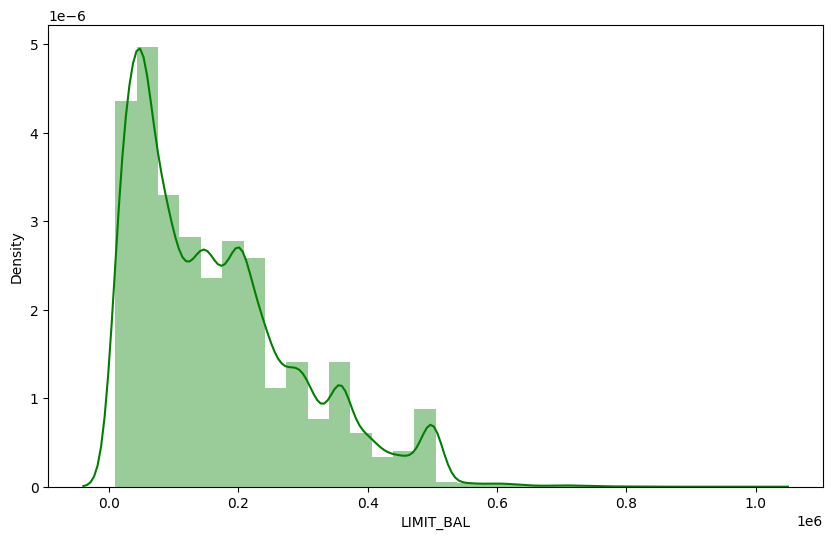

In [ ]:
# Chart - 9 visualization code
# Creating a distplot for "LIMIT_BAL"
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
sns.distplot(df['LIMIT_BAL'],kde=True,bins=30, color = 'g')

##### 1. Why did you pick the specific chart?

This specific chart represent the distribution of credit limits on the x-axis and the probability density (or frequency) on the y-axis. The KDE curve offers a smooth representation of the distribution.



##### 2. What is/are the insight(s) found from the chart?

The distribution of credit limits appears to be right-skewed, with a higher concentration of clients having lower credit limits.

There are spikes in the distribution, indicating that certain credit limit values are more common than others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of credit limits helps in setting appropriate credit limits for clients, considering the majority of clients have lower limits.

Identifying the spikes in the distribution can help tailor marketing efforts and financial product offerings to clients with specific credit limit preferences.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

# Dropping the column "ID"
df = df.drop(['ID'],axis=1)

<Axes: >

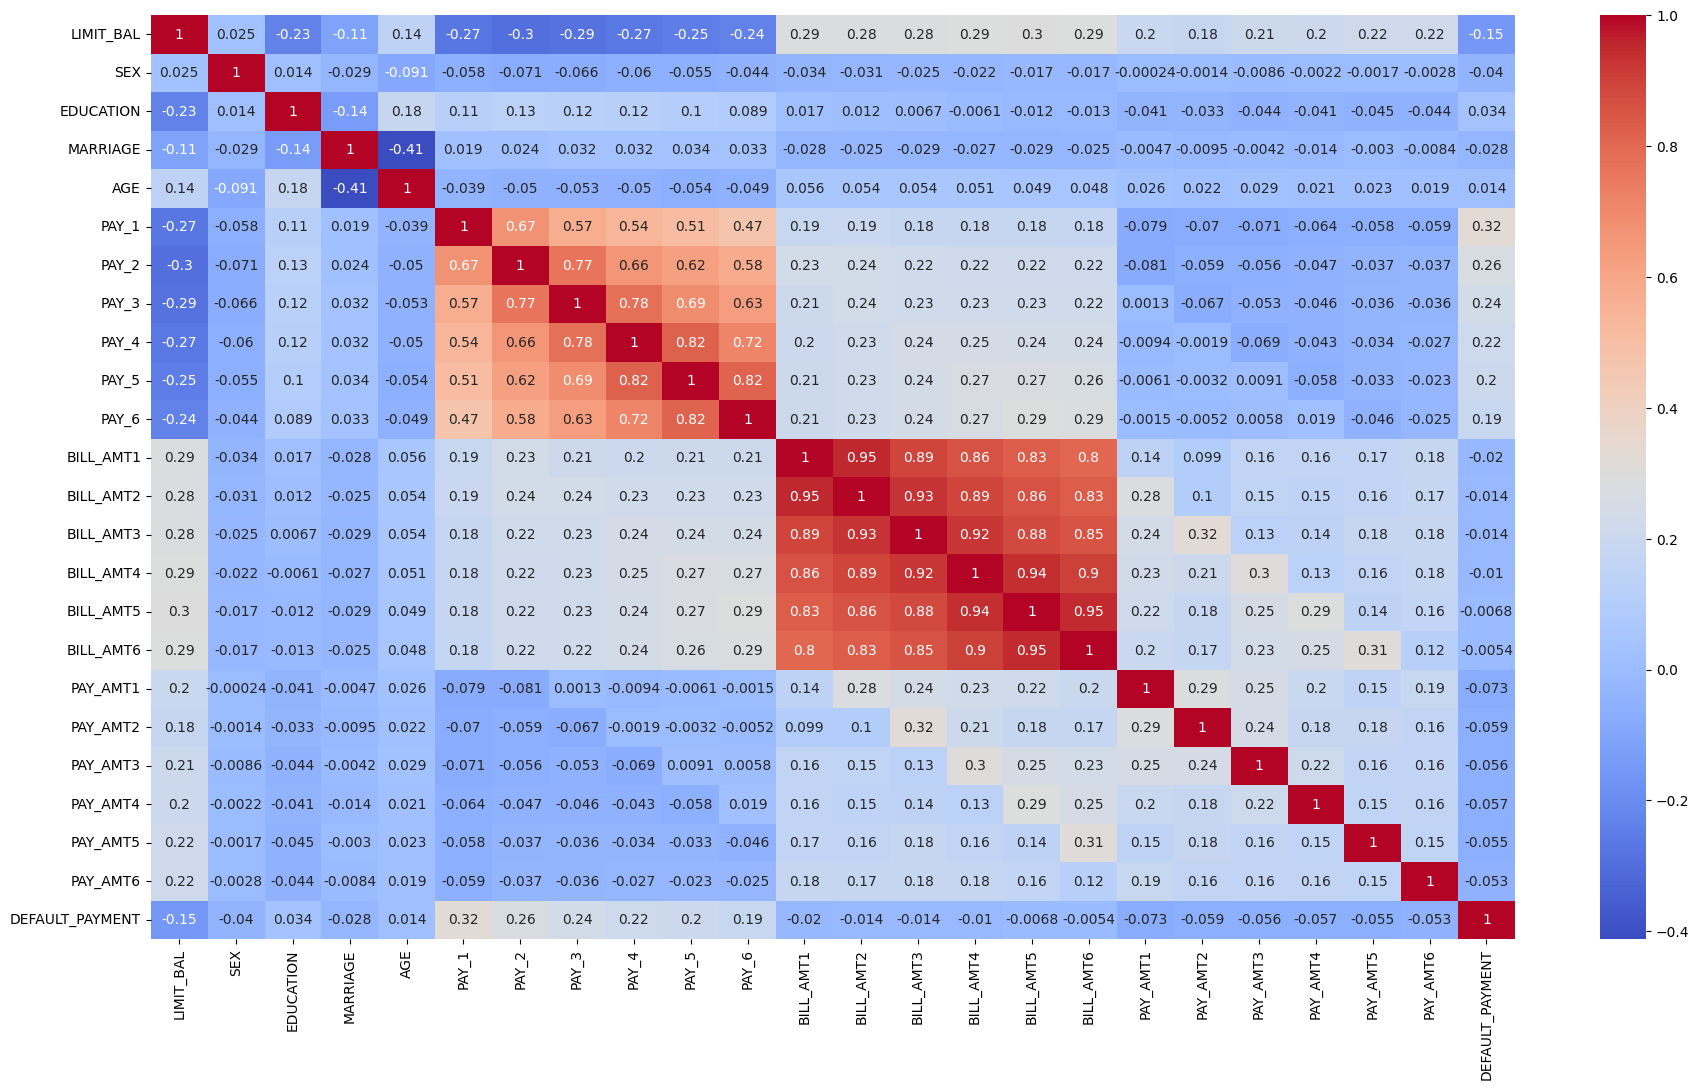

In [ ]:
# Finding the correlation between different attribute
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

##### 1. Why did you pick the specific chart?

A heatmap is chosen because it effectively displays the correlation matrix, allowing for a quick and clear assessment of relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

**BILL_AMT1 to BILL_AMT6:** The bill amounts for each month are highly positively correlated with each other. This indicates that clients who have higher bills in one month tend to have higher bills in other months as well.

**PAY_1 to PAY_6:**The repayment statuses for each month are moderately correlated with each other. Clients who have delayed payments in one month are likely to exhibit similar payment behavior in other months.

**LIMIT_BAL:** Credit limit shows a relatively weak positive correlation with some of the bill amounts (e.g., BILL_AMT1) and a weak negative correlation with some of the payment statuses (e.g., PAY_1). This suggests that clients with higher credit limits tend to have higher bills but may have better payment behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the correlations between attributes helps in identifying relationships that can inform credit risk assessment and product strategies.

Recognizing the relationships between attributes allows for tailored financial product offerings and marketing strategies.

#### Chart - 11

<Axes: title={'center': 'Correlation with Default_Payment'}>

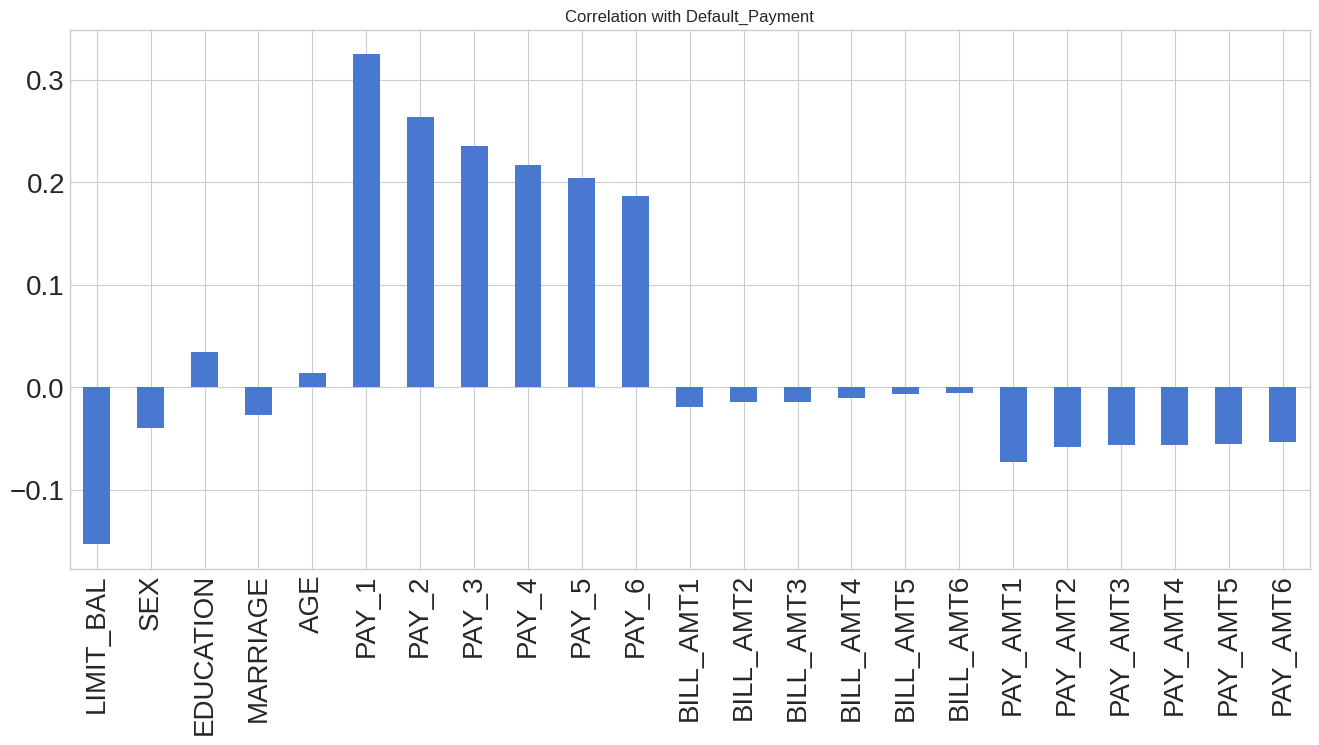

In [ ]:
# Chart - 11 visualization code
# Correlation between independent variables and dependent variable.
X = df.drop(['DEFAULT_PAYMENT'],axis=1)
plt.style.use('seaborn-whitegrid')
X.corrwith(df['DEFAULT_PAYMENT']).plot.bar(figsize = (16, 7), title = "Correlation with Default_Payment",
                                        fontsize = 20,rot = 90, grid = True)

##### 1. Why did you pick the specific chart?

 It allows for a clear comparison of correlation values for each independent variable, making it easy to identify which features have a stronger or weaker correlation with the target variable.

##### 2. What is/are the insight(s) found from the chart?

Education and age  variables have a positive correlation with 'DEFAULT_PAYMENT,indicating that higher values of these variables are associated with a higher likelihood of default.

Sex and marriage variables have a negative correlation with 'DEFAULT_PAYMENT,' indicating that higher values of these variables are associated with a lower likelihood of default.

The magnitude of correlation (the height of the bars) represents the strength of the relationship. Features with taller bars have a stronger correlation with 'DEFAULT_PAYMENT.'

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Features with a strong positive correlation with 'DEFAULT_PAYMENT' may be useful in predicting default risk. They can be used as important factors in credit scoring models.

Features with a strong negative correlation with 'DEFAULT_PAYMENT' may indicate factors that reduce the risk of default. These factors can inform credit risk assessment and product offerings.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Creating a class to calculate mean, median, variance, P value and all other metrics required for the calculation of hypothesis testing.

In [ ]:
# Creating Parameter Class
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

1. Men not defaulting are more than or equal to 40 years of AGE.
2. Customers defaulting have limit balance less than 100000.
3. Customers defaulting have total last bill amount of 50000.

In all of the hypothesis tests in this notebook, we will use a significance level of α = 0.05

### Hypothetical Statement - 1

Men not defaulting are more than or equal to 40 years of AGE.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 40

Alternate Hypothesis : N < 40

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# SEX:
# 1 = male; 2 = female

# DEFAULT_PAYMENT:
# 0 = non-default; 1 = default

hypo_1 = df[(df['SEX']==1) & (df["DEFAULT_PAYMENT"]==0)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 40
sample_mean = hypo_1["AGE"].mean()
size = len(hypo_1)
std=(variance(hypo_1["AGE"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="AGE")

# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.2867824212425077e-290


##### Which statistical test have you done to obtain P-Value?

I used Z-Test as the statistical testing to get the P-Value, and the results showed that the null hypothesis could not be rejected, and male customers who didn't default were over 40 years old.

##### Why did you choose the specific statistical test?

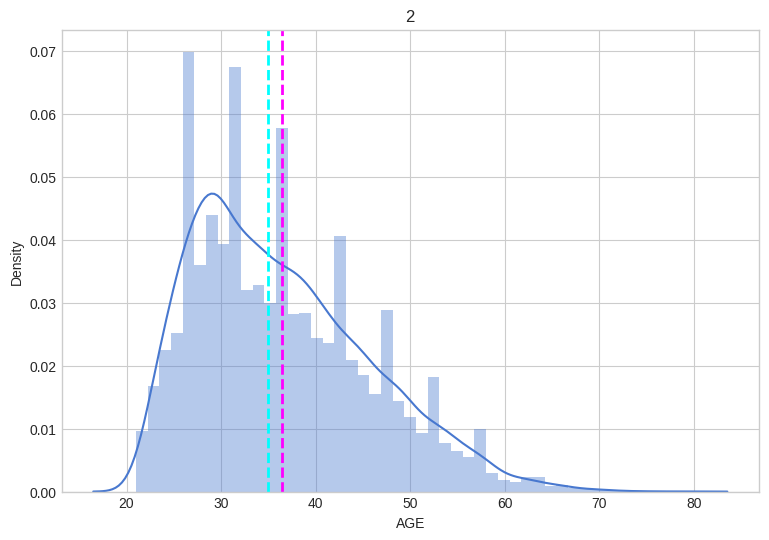

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["AGE"])
sns.distplot(hypo_1["AGE"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_1["AGE"].mean()- hypo_1["AGE"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 1.4286189683860258


The figure demonstrates that the mean and median are roughly equivalent; the difference between them is 1.38 (less than 10). As a result, the distribution is normal. I have used Z-Test directly as a result.

We have failed to reject the null hypothesis that N < 40

### Hypothetical Statement - 2

Customers defaulting have limit balance less than 100000

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 100000

Alternate Hypothesis : N > 100000

Test Type: Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value


# DEFAULT_PAYMENT:
# 0 = non-default; 1 = default
hypo_2=df[(df["DEFAULT_PAYMENT"]==1)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 100000
sample_mean = hypo_2["LIMIT_BAL"].mean()
size = len(hypo_2)
std=(variance(hypo_2["LIMIT_BAL"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='r',t="true",hypothesis_number=hypothesis_number,df=hypo_2,col="LIMIT_BAL")

# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 4.4753017364632867e-97


##### Which statistical test have you done to obtain P-Value?

I used T-Test as the statistical testing to get the P-Value, and the result showed that the null hypothesis was wrong and that customers who defaulted had a limit balance of less than 100,000.

##### Why did you choose the specific statistical test?

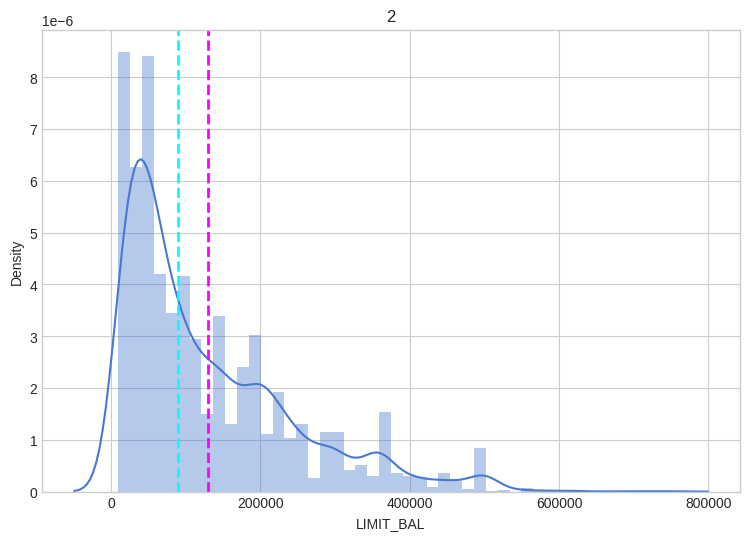

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_2["LIMIT_BAL"])
sns.distplot(hypo_2["LIMIT_BAL"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_2["LIMIT_BAL"].mean()- hypo_2["LIMIT_BAL"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 40109.65641952984


The graph above demonstrates that the median is greater than the mean above 10,000. As a result, the distribution is positively skewed. Z-Test cannot be used with skewed data.

For small studies, non-parametric tests are most useful. In large studies, the use of non-parametric tests may answer the wrong question, causing readers confusion. Even with heavily skewed data, t-tests and the confidence intervals that go along with them should be used in studies with large sample sizes.

Therefore, the T-test can yield better results for skewed data. So, I used the t-test.

## ***6. Feature Engineering & Data Pre-processing***

### **6.1 Handling Imbalanced Dataset**

0    23364
1     6636
Name: DEFAULT_PAYMENT, dtype: int64


<Axes: xlabel='DEFAULT_PAYMENT', ylabel='count'>

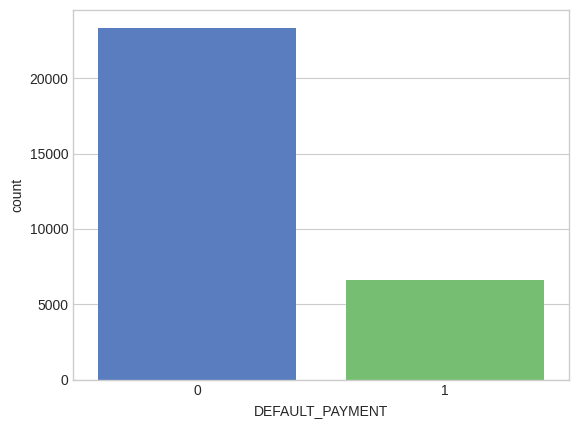

In [ ]:
# Lets us check whether the dataset is imbalanced or not
print(df['DEFAULT_PAYMENT'].value_counts())
sns.countplot(x='DEFAULT_PAYMENT', data=df)

##### Do you think the dataset is imbalanced? Explain Why.

- It can be clearly observed from the above graph that the **dataset is imbalanced.**

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Creating a SMOTE function.
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, df['DEFAULT_PAYMENT'])

print('Original shape of Dataset', len(X))
print('Resampled shape of Dataset', len(y_smote))

Original shape of Dataset 30000
Resampled shape of Dataset 46728


In [ ]:
# Creating a new dataframe after using SMOTE
balance_df = pd.DataFrame(x_smote, columns = list(X.columns))
balance_df['DEFAULT_PAYMENT'] = y_smote

<Axes: xlabel='DEFAULT_PAYMENT', ylabel='count'>

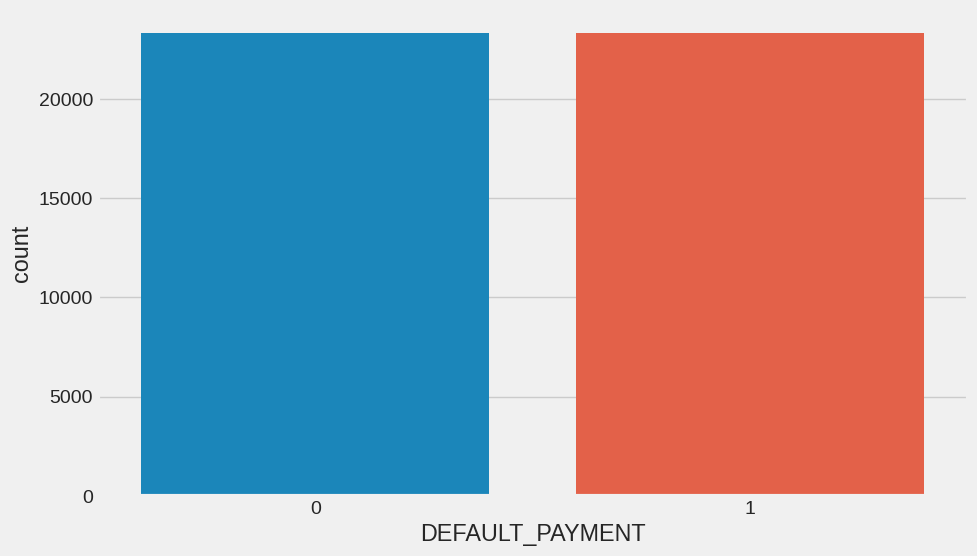

In [ ]:
# Chart - 12 visualization code
# Creating a count plot for "DEFAULT_PAYMENT"
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
sns.countplot(x='DEFAULT_PAYMENT', data=balance_df)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**SMOTE (Synthetic Minority Oversampling Technique)**

In [ ]:
balance_df[balance_df['DEFAULT_PAYMENT']==1] # filtring default payment column

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,70000,1,2,2,30,1,2,2,0,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,20000,1,1,2,24,0,0,2,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,120000,2,2,1,39,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,100000,1,2,1,30,2,2,2,2,2,...,75207,74965,76536,0,4102,4169,1591,2808,2842,1
46724,50000,1,2,1,28,2,2,2,2,2,...,35448,34713,37036,2303,0,2557,0,3059,0,1
46725,100000,2,1,1,28,1,-2,-2,-2,-2,...,0,0,62,0,0,0,0,62,0,1
46726,30000,1,2,1,32,-1,-1,-1,-1,-1,...,464,299,364,120,299,464,299,364,6025,1


In [ ]:
# Creating a dummy copy of our dataset
df = balance_df.copy()

### **6.2 Binning**

In [ ]:
# Bin ‘AGE’ data to 6 groups
bins= [21,30,40,50,60,70,80]
labels = list(range(6))
df['AGE'] = pd.cut(df['AGE'], bins=bins, labels=labels,right=False)

NameError: ignored

### **6.3 Change Datatype**

In [ ]:
# Covert categorical column into integer by extracting the code of the categories
df = df.astype({"AGE":'int64'})

NameError: ignored

### **6.4 Data Splitting**

In [ ]:
# Define predictor variables and target variable
X = df.drop(columns=['DEFAULT_PAYMENT'])
y = df['DEFAULT_PAYMENT']

# Save all feature names as list
feature_cols = X.columns.tolist()

# Extract numerical columns and save as a list for rescaling
X_num = X.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'])
num_cols = X_numns.tolist()um.col

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

##### What data splitting ratio have you used and why?

- Splitting ratio used is 0.3




### **6.5 Data Scaling**

In [ ]:
# Define function to rescale training data using StandardScaler

def standard_scaler(X_train, X_test, numerical_cols):

  # Make copies of dataset
  X_train_std = X_train.copy()
  X_test_std = X_test.copy()

  # Apply standardization on numerical features only
  for i in numerical_cols:
    scl = StandardScaler().fit(X_train_std[[i]])     # fit on training data columns
    X_train_std[i] = scl.transform(X_train_std[[i]]) # transform the training data columns
    X_test_std[i] = scl.transform(X_test_std[[i]])   # transform the testing data columns

  return X_train_std,X_test_std

X_train_std, X_test_std = standard_scaler(X_train, X_test, numerical_cols = num_cols)

##### Which method have you used to scale you data and why?

Standardscaler method is used to scale the dataset.

## ***7. ML Model Implementation***

### Function to calculates and display different evaluation metrics

In [ ]:
def cal_metric(model, X, y):
  '''
  This function calculates accuracy, precision, recall and F1 score using confusion matrix.
  '''
  # predicting value and probability
  y_pred = model.predict(X)
  y_pred_prob = model.predict_proba(X)[:, 1]

  # tn/tp ---> true negative/positive; fn/fp ---> false negative/positive
  tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

  ''' Performance Metrics '''
  #Calculate Accuracy  ---->  (TP+TN)/(TP+FP+TN+FN)
  accuracy = round((tp + tn) / (tn + fp + tp + fn), 3)

  #Calculate Precision  ---->  TP/(TP+FP)
  precision = round(tp / (tp + fp), 3)

  #Calculate Recall  ---->  TP/(TP+FN)
  recall = round(tp / (tp + fn), 3)

  #Calculate F1 Score  ---->  Harmonic Mean of Precision and Recall
  F1 = round(2 * (precision * recall) / (precision + recall), 3)

  #Calculate ROC AUC Score
  # Predict the probabilities of belonging to the positive class

  roc_auc = round(roc_auc_score(y, y_pred_prob), 3)

  return accuracy, precision, recall, F1, roc_auc

In [ ]:
# This function displays Accuracy, Precision, Recall and F1 score
result = []
cm_list = []
def show_metric(model, X_train, X_test, y_train, y_test, model_name):
  '''
  This function display accuracy, precision, recall and F1 score using confusion matrix in table and store the result it a list.
  '''

  train_accuracy, train_precision, train_recall, train_F1, train_roc_auc = cal_metric(model, X_train, y_train)
  test_accuracy, test_precision, test_recall, test_F1, test_roc_auc = cal_metric(model, X_test, y_test)

  #Create table
  myTable = PrettyTable(['Model', 'train/test', 'Accurcay', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC'])
  # myTable = PrettyTable(['Model', 'Test_Accurcay', 'Test_Precision', 'Test_Recall', 'Test_F1_Score', 'Test_ROC_AUC'])
  # Add rows
  myTable.add_row([model_name, 'train_socres', train_accuracy, train_precision, train_recall, train_F1,train_roc_auc,])
  myTable.add_row([model_name, 'test_scores', test_accuracy, test_precision, test_recall, test_F1, test_roc_auc ])
  print(myTable)

  # append all the scores in this model.
  result.append({'Model':model_name,
                      'Train_Accurcay': train_accuracy,
                      'Test_Accurcay': test_accuracy,
                      'Train_Precision': train_precision,
                      'Test_Precision': test_precision,
                      'Train_Recall': train_recall,
                      'Test_Recall': test_recall,
                      'Train_F1_Score': train_F1,
                      'Test_F1_Score': test_F1,
                      'Train_ROC_AUC': train_roc_auc,
                      'Test_ROC_AUC': test_roc_auc
                                                })


### Evaluation Metrics used:

* **Accuracy:** Accuracy is the percentage of correct predictions made by a classifier. It's calculated as the ratio of correct predictions to the total predictions. While a high accuracy rate, like 99%, may seem impressive, it can be misleading in some cases. Accuracy is valuable when dealing with balanced classes, but it's not suitable for unbalanced ones.

* **Confusion Matrix:** The Confusion Matrix is a tool for evaluating the performance of machine learning classification models, especially when there are two or more output classes. It presents a table of combinations between actual and predicted values. This matrix is commonly used to assess how well a classification model performs on test data with known true values. It's particularly useful for understanding AUC-ROC curves, precision, recall, and accuracy.

* **Precision:** Precision measures the percentage of correctly predicted positive cases among all the predicted positives. It is especially useful when you're more concerned about minimizing False Positives than False Negatives. To calculate precision for a label, divide the number of correctly predicted positives by the total number of predicted positives.

* **Recall:** Recall gauges the proportion of actual positive cases that the model correctly identifies. This metric is valuable when minimizing False Negatives is more critical than avoiding False Positives. In fields like medicine, it's essential not to miss actual positive cases even if it means raising some false alarms. Recall for a label is calculated by dividing the number of true positives by the total number of actual positives.

* **F1 Score:** The F1 Score is a metric that balances both Precision and Recall. It reaches its highest value when Precision and Recall are equal. This score is the harmonic mean of Precision and Recall.

* **AUC-ROC:** The Receiver Operator Characteristic (ROC) is a probability curve that helps separate the "signal" from the "noise" by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold values. The Area Under the Curve (AUC) is a measure of a classifier's ability to distinguish between classes. An AUC of 1 indicates that the classifier can perfectly differentiate between all positive and negative class points. Conversely, an AUC of 0 means the classifier identifies all negatives as positives.

### **7.1 Logistic Regression**

Logistic regression is a statistical model used for binary classification. It estimates the probability that a given input belongs to one of two possible classes, and it's particularly useful when the relationship between the input variables and the binary outcome is not linear.

In [ ]:
# Rescale data
X_train_std, X_test_std = standard_scaler(X_train, X_test, numerical_cols = num_cols)

# Instantiate model
clf_lr = LogisticRegression(random_state=42)

# Fit the model
lr = clf_lr.fit(X_train_std, y_train)

In [ ]:
# Visualizing evaluation Metric Score chart
show_metric(lr, X_train_std, X_test_std, y_train, y_test, 'Logistic Regression')

+---------------------+--------------+----------+-----------+--------+----------+---------+
|        Model        |  train/test  | Accurcay | Precision | Recall | F1_Score | ROC_AUC |
+---------------------+--------------+----------+-----------+--------+----------+---------+
| Logistic Regression | train_socres |  0.722   |   0.722   | 0.722  |  0.722   |  0.793  |
| Logistic Regression | test_scores  |  0.718   |   0.716   | 0.723  |  0.719   |  0.793  |
+---------------------+--------------+----------+-----------+--------+----------+---------+


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# paramter grid values for hyperparameter tunning.
grid_values = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'penalty':['l2', 'l1']}

# Instantiate the model
clf_lr = LogisticRegression(random_state=42)

# Instantiate grid search model
lr_grid = GridSearchCV(estimator = clf_lr, param_grid = grid_values, cv = 3, verbose = 1)

# Fit grid search to the data
lr_grid.fit(X_train_std, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'l1']},
             verbose=1)

In [ ]:
# getting best parameters for model.
lr_grid.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [ ]:
# Using the optimal data and fitting the data
lr_best = LogisticRegression(penalty = 'l2', C = 0.01)
lr_optimal = lr_best.fit(X_train_std, y_train)

In [ ]:
show_metric(lr_optimal, X_train_std, X_test_std, y_train, y_test, 'Logistic Regression tuned')

+---------------------------+--------------+----------+-----------+--------+----------+---------+
|           Model           |  train/test  | Accurcay | Precision | Recall | F1_Score | ROC_AUC |
+---------------------------+--------------+----------+-----------+--------+----------+---------+
| Logistic Regression tuned | train_socres |  0.723   |   0.723   | 0.723  |  0.723   |  0.793  |
| Logistic Regression tuned | test_scores  |  0.719   |   0.717   | 0.723  |   0.72   |  0.793  |
+---------------------------+--------------+----------+-----------+--------+----------+---------+


##### Which hyperparameter optimization technique have you used and why?

- Grid search CV is used as hyperparameter optimisation technique with hyperparamters as 'C' and 'penalty'


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Results after optimisation are similar to baseline model.

### **7.2 K-Nearest Neighbors  (KNN)**

K-Nearest Neighbors (K-NN) is a machine learning algorithm used for classification tasks. It makes predictions based on the similarity of a new data point to the K nearest data points in a training dataset, where K is a user-defined parameter. For classification, it assigns the class most common among the K-nearest neighbors, while for regression, it predicts a value based on the average or weighted average of the target values of those neighbors.

In [ ]:
#Baseline model
clf_knn = KNeighborsClassifier()

# Fit the Algorithm
knn = clf_knn.fit(X_train_std, y_train)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
show_metric(knn, X_train_std, X_test_std, y_train, y_test, 'K-Nearest_Neighbors')

+---------------------+--------------+----------+-----------+--------+----------+---------+
|        Model        |  train/test  | Accurcay | Precision | Recall | F1_Score | ROC_AUC |
+---------------------+--------------+----------+-----------+--------+----------+---------+
| K-Nearest_Neighbors | train_socres |  0.838   |   0.823   |  0.86  |  0.841   |  0.923  |
| K-Nearest_Neighbors | test_scores  |  0.757   |   0.744   | 0.784  |  0.763   |  0.831  |
+---------------------+--------------+----------+-----------+--------+----------+---------+


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# parameter grid values.
grid_values = {'n_neighbors':list(range(1, 21))}

# Instantiate the model
clf_knn = KNeighborsClassifier()

# Instantiate grid search model
knn_grid = GridSearchCV(estimator = clf_knn, param_grid = grid_values, cv = 3, verbose = 1)

# Fit grid search to the data
knn_grid.fit(X_train_std, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             verbose=1)

In [ ]:
# getting best parameters for model.
knn_grid.best_params_

{'n_neighbors': 9}

In [ ]:
# Using the optimal data and fitting the data
knn_best = KNeighborsClassifier(n_neighbors = 13)
knn_optimal = knn_best.fit(X_train_std, y_train)

In [ ]:
show_metric(knn_optimal, X_train_std, X_test_std, y_train, y_test, 'K-Nearest Neighbors tuned')

+---------------------------+--------------+----------+-----------+--------+----------+---------+
|           Model           |  train/test  | Accurcay | Precision | Recall | F1_Score | ROC_AUC |
+---------------------------+--------------+----------+-----------+--------+----------+---------+
| K-Nearest Neighbors tuned | train_socres |  0.793   |   0.787   | 0.802  |  0.794   |  0.879  |
| K-Nearest Neighbors tuned | test_scores  |  0.759   |   0.754   | 0.767  |   0.76   |  0.835  |
+---------------------------+--------------+----------+-----------+--------+----------+---------+


##### Which hyperparameter optimization technique have you used and why?

-  Grid search CV is used as hyperparameter optimisation technique and  hyperparamters used are 'n_neighbors'.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Model perfromance  has improved.

### **7.3 Support Vector Classifier**

In [ ]:
# ML Model Implementation

# Instantiate model
clf_svc = SVC(random_state=42, probability = True)

# Fit the model
svc = clf_svc.fit(X_train_std, y_train)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
show_metric(svc, X_train_std, X_test_std, y_train, y_test, 'Support Vector Classifier')

+---------------------------+--------------+----------+-----------+--------+----------+---------+
|           Model           |  train/test  | Accurcay | Precision | Recall | F1_Score | ROC_AUC |
+---------------------------+--------------+----------+-----------+--------+----------+---------+
| Support Vector Classifier | train_socres |  0.767   |   0.782   | 0.742  |  0.761   |  0.845  |
| Support Vector Classifier | test_scores  |   0.76   |   0.774   | 0.735  |  0.754   |  0.834  |
+---------------------------+--------------+----------+-----------+--------+----------+---------+


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# parameter grid for GridSearchCv
grid_values = {'C':[0.01,0.1,1,10],
               'kernel' : ["rbf"]}

# Instantiate the model
clf_svc = SVC(probability = True)

# Instantiate grid search model
svc_grid = GridSearchCV(estimator = clf_svc, param_grid = grid_values, cv = 3, verbose = 1)

# Fit grid search to the data
svc_grid.fit(X_train_std, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['rbf']},
             verbose=1)

In [ ]:
# getting best parameters for model.
svc_grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
# Using the optimal data and fitting the data
svc_best = SVC(C = 10, kernel = 'rbf', probability = True)
svc_optimal = svc_best.fit(X_train_std, y_train)

In [ ]:
show_metric(svc_optimal, X_train_std, X_test_std, y_train, y_test, 'Support Vector Classifier tuned')

+---------------------------------+--------------+----------+-----------+--------+----------+---------+
|              Model              |  train/test  | Accurcay | Precision | Recall | F1_Score | ROC_AUC |
+---------------------------------+--------------+----------+-----------+--------+----------+---------+
| Support Vector Classifier tuned | train_socres |  0.793   |   0.805   | 0.773  |  0.789   |  0.872  |
| Support Vector Classifier tuned | test_scores  |  0.771   |   0.782   | 0.753  |  0.767   |  0.846  |
+---------------------------------+--------------+----------+-----------+--------+----------+---------+


##### Which hyperparameter optimization technique have you used and why?

-  Grid search CV is used as hyperparameter optimisation technique and  hyperparamters used are 'C', 'kernel'.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Model performance remains same after optimisation.

### **7.4 Decision Tree Classifier**

A Decision Tree classifier is a machine learning model used for both classification and regression tasks. It builds a tree-like structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node corresponds to a class label (in classification) or a numerical value (in regression), making it a straightforward and interpretable model for decision-making.

In [ ]:

# Instantiate model
clf_dt = DecisionTreeClassifier()

# Fit the model
dt = clf_dt.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
show_metric(dt, X_train, X_test, y_train, y_test, 'Decision Tree Classifier')

+--------------------------+--------------+----------+-----------+--------+----------+---------+
|          Model           |  train/test  | Accurcay | Precision | Recall | F1_Score | ROC_AUC |
+--------------------------+--------------+----------+-----------+--------+----------+---------+
| Decision Tree Classifier | train_socres |  0.998   |   0.998   | 0.998  |  0.998   |   1.0   |
| Decision Tree Classifier | test_scores  |  0.753   |   0.747   | 0.765  |  0.756   |  0.754  |
+--------------------------+--------------+----------+-----------+--------+----------+---------+


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# paramter grid values for hyperparameter tunning.
grid_values = {'criterion':['gini','entropy'],
               'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
               'splitter':['best','random'],
               'min_samples_split':[3,5,10],
               'max_features':['auto','sqrt','log2',None]}

# Instantiate the model
clf_dt = DecisionTreeClassifier()

# Instantiate grid search model
ct_grid = GridSearchCV(estimator = clf_dt, param_grid = grid_values, cv = 3, verbose = 1)

# Fit the Algorithm
ct_grid.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# getting best parameters for model.
ct_grid.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'min_samples_split': 3,
 'splitter': 'best'}

In [ ]:
# Using the optimal data and fitting the data
dt_best = DecisionTreeClassifier(criterion = 'gini', max_depth = 11, max_features = None, min_samples_split = 3, splitter = 'best')
dt_optimal = dt_best.fit(X_train_std, y_train)

In [ ]:
show_metric(dt_optimal, X_train, X_test, y_train, y_test, 'Decision Tree Classifier tuned')

+--------------------------------+--------------+----------+-----------+--------+----------+---------+
|             Model              |  train/test  | Accurcay | Precision | Recall | F1_Score | ROC_AUC |
+--------------------------------+--------------+----------+-----------+--------+----------+---------+
| Decision Tree Classifier tuned | train_socres |  0.527   |    0.53   | 0.477  |  0.502   |  0.474  |
| Decision Tree Classifier tuned | test_scores  |  0.529   |   0.532   | 0.487  |  0.509   |  0.481  |
+--------------------------------+--------------+----------+-----------+--------+----------+---------+


##### Which hyperparameter optimization technique have you used and why?

-  Grid search CV is used as hyperparameter optimisation technique and  hyperparamters used are 'criterion', 'max_depth', 'splitter' 'min_samples_split' and 'max_features'.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Following optimization, the model has shown improvement, with the overfitting issue successfully addressed.

### **7.5 Random Forest Classifier**

A Random Forest classifier is an ensemble machine learning model that combines multiple decision trees to make predictions. It's used for classification tasks and offers improved accuracy and robustness by aggregating the results from many individual decision trees.

In [ ]:
# ML Model Implementation

clf_rf = RandomForestClassifier()

# Fit the Algorithm
rf = clf_rf.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
show_metric(rf, X_train, X_test, y_train, y_test, 'Random Forest Classifier')

+--------------------------+--------------+----------+-----------+--------+----------+---------+
|          Model           |  train/test  | Accurcay | Precision | Recall | F1_Score | ROC_AUC |
+--------------------------+--------------+----------+-----------+--------+----------+---------+
| Random Forest Classifier | train_socres |  0.998   |   0.997   | 0.998  |  0.997   |   1.0   |
| Random Forest Classifier | test_scores  |  0.839   |   0.852   | 0.819  |  0.835   |  0.913  |
+--------------------------+--------------+----------+-----------+--------+----------+---------+


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# paramter grid values for hyperparameter tunning.
grid_values = {'n_estimators':[100, 200, 300],
               'max_depth':[10, 20, 30, 40]}

# Instantiate the model
clf_rf = RandomForestClassifier()

# Instantiate grid search model
rf_grid = GridSearchCV(estimator = clf_rf, param_grid = grid_values, cv = 3, verbose = 1)

# Fit the Algorithm
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [ ]:
# getting best parameters for model.
rf_grid.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [ ]:
# Using the optimal data and fitting the data
rf_best = RandomForestClassifier(max_depth = 40, n_estimators = 300)
rf_optimal = rf_best.fit(X_train, y_train)

In [ ]:
show_metric(rf_optimal, X_train, X_test, y_train, y_test, 'Random Forest Classifier tuned')

+--------------------------------+--------------+----------+-----------+--------+----------+---------+
|             Model              |  train/test  | Accurcay | Precision | Recall | F1_Score | ROC_AUC |
+--------------------------------+--------------+----------+-----------+--------+----------+---------+
| Random Forest Classifier tuned | train_socres |  0.624   |   0.922   | 0.271  |  0.419   |  0.728  |
| Random Forest Classifier tuned | test_scores  |  0.617   |   0.906   | 0.261  |  0.405   |  0.723  |
+--------------------------------+--------------+----------+-----------+--------+----------+---------+


##### Which hyperparameter optimization technique have you used and why?

- Grid search CV is used as hyperparameter optimisation technique and hyperparamters used are 'n_estimator' and 'max_depth'.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Following optimization, the model has shown improvement, with the overfitting issue successfully addressed.

### **7.6 XGBoost Classifier**

XGBoost (Extreme Gradient Boosting) Classifier is a machine learning algorithm known for its efficiency and high performance in various classification tasks. It is an ensemble learning method that combines the predictions of multiple decision trees. XGBoost is designed to optimize predictive accuracy and is particularly effective in handling structured/tabular data. It uses gradient boosting techniques to iteratively improve the model's performance, making it one of the popular choices for classification problems in machine learning.

In [ ]:
# ML Model Implementation

# Instantiate model
clf_xgb = XGBClassifier()

# Fit the Algorithm
xgb = clf_xgb.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
show_metric(xgb, X_train, X_test, y_train, y_test, 'XGBoost Classifier')

+--------------------+--------------+----------+-----------+--------+----------+---------+
|       Model        |  train/test  | Accurcay | Precision | Recall | F1_Score | ROC_AUC |
+--------------------+--------------+----------+-----------+--------+----------+---------+
| XGBoost Classifier | train_socres |  0.899   |   0.912   | 0.882  |  0.897   |  0.966  |
| XGBoost Classifier | test_scores  |  0.825   |   0.838   | 0.806  |  0.822   |  0.905  |
+--------------------+--------------+----------+-----------+--------+----------+---------+


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# parameter grid values for GridSearchCv
grid_values = {'learning_rate':[0.6,1],
               'n_estimators':[500,1000],
              'gamma':[0.2],
              'subsample':[0.5,0.6]}

# Instantiate the model
clf_xgb = XGBClassifier()

# Instantiate grid search model
xgb_grid = GridSearchCV(estimator = clf_xgb, param_grid = grid_values, cv = 3, verbose = 1)

# Fit the Algorithm
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=1)

In [ ]:
# getting best parameters for model.
xgb_grid.best_params_

{'gamma': 0.2, 'learning_rate': 0.6, 'n_estimators': 1000, 'subsample': 0.6}

In [ ]:
# Using the optimal data and fitting the data
xgb_best = XGBClassifier(gamma = 0.2, learning_rate = 0.6, n_estimators = 1000, subsample = 0.6)
xgb_optimal = xgb_best.fit(X_train_std, y_train)

In [ ]:
show_metric(xgb_optimal, X_train, X_test, y_train, y_test, 'XGBoost Classifier tuned')

+--------------------------+--------------+----------+-----------+--------+----------+---------+
|          Model           |  train/test  | Accurcay | Precision | Recall | F1_Score | ROC_AUC |
+--------------------------+--------------+----------+-----------+--------+----------+---------+
| XGBoost Classifier tuned | train_socres |   0.66   |   0.727   | 0.512  |  0.601   |  0.717  |
| XGBoost Classifier tuned | test_scores  |  0.658   |   0.725   | 0.511  |  0.599   |  0.714  |
+--------------------------+--------------+----------+-----------+--------+----------+---------+


##### Which hyperparameter optimization technique have you used and why?

- Grid search CV is used as hyperparameter optimisation technique and hyperparamters used are 'n_estimator', 'learning_rate', 'gamma' and 'subsample'.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Following optimization, the model has shown improvement, with the overfitting issue successfully addressed.

### **7.7 Model Results**

#### **7.7.1 Results comparison**

In [ ]:
result_df = pd.DataFrame(result)
result_df.sort_values(by = 'Test_ROC_AUC', ascending = False).set_index('Model')

,Train_Accurcay,Test_Accurcay,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1_Score,Test_F1_Score,Train_ROC_AUC,Test_ROC_AUC
Model,,,,,,,,,,
Random Forest Classifier,0.998,0.839,0.997,0.852,0.998,0.819,0.997,0.835,1.000,0.913
XGBoost Classifier,0.899,0.825,0.912,0.838,0.882,0.806,0.897,0.822,0.966,0.905
Support Vector Classifier tuned,0.793,0.771,0.805,0.782,0.773,0.753,0.789,0.767,0.872,0.846
K-Nearest Neighbors tuned,0.793,0.759,0.787,0.754,0.802,0.767,0.794,0.760,0.879,0.835
Support Vector Classifier,0.767,0.760,0.782,0.774,0.742,0.735,0.761,0.754,0.845,0.834
K-Nearest_Neighbors,0.838,0.757,0.823,0.744,0.860,0.784,0.841,0.763,0.923,0.831
Logistic Regression,0.722,0.718,0.722,0.716,0.722,0.723,0.722,0.719,0.793,0.793
Logistic Regression tuned,0.723,0.719,0.723,0.717,0.723,0.723,0.723,0.720,0.793,0.793
Decision Tree Classifier,0.998,0.753,0.998,0.747,0.998,0.765,0.998,0.756,1.000,0.754


#### **7.7.2 Result plot**

Text(0.5, 1.0, 'XGBoost')

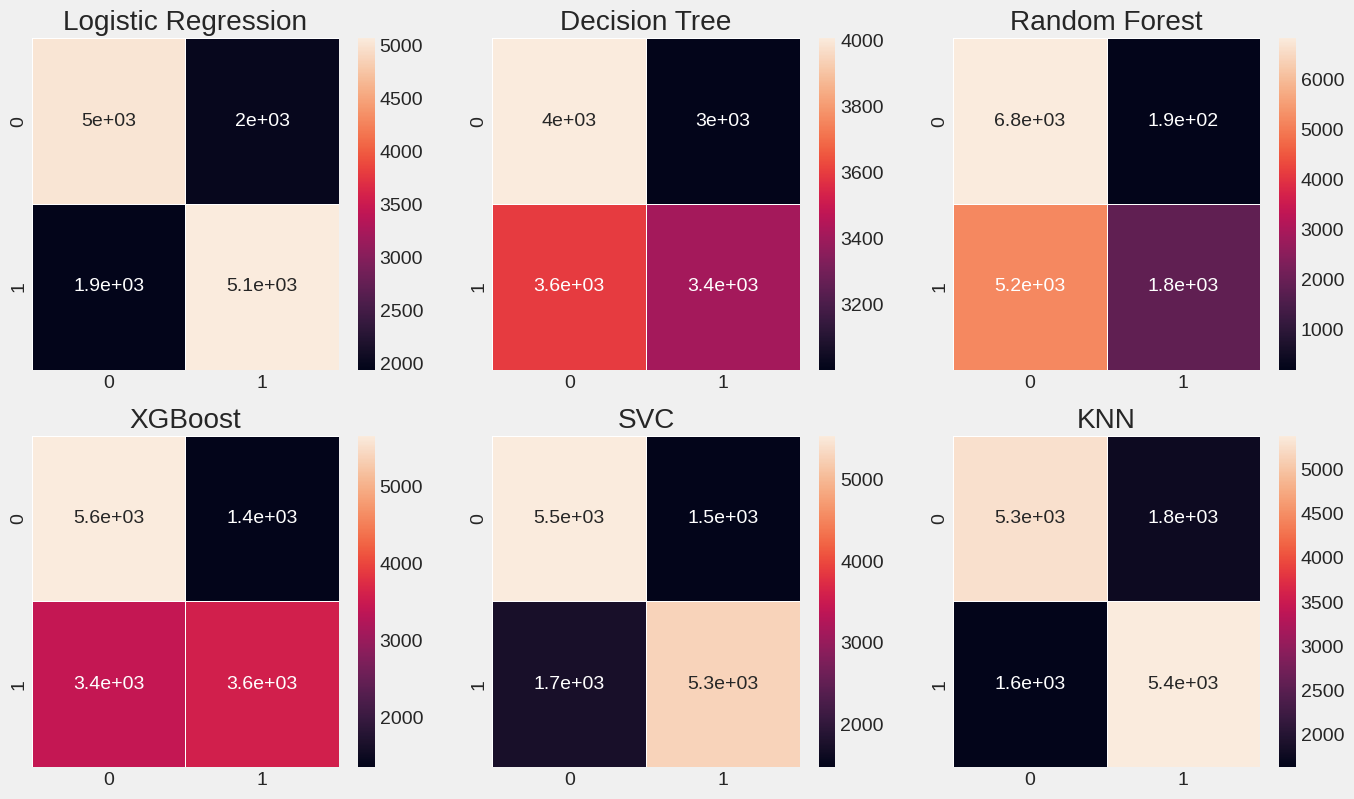

In [ ]:
# Plot confusion matrix of 6 models
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(2,3, figsize=(15, 9))
ax = ax.ravel()

y_pred = lr_optimal.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, linewidth=.5, ax = ax[0])
ax[0].set_title("Logistic Regression")

y_pred = svc_optimal.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, linewidth=.5, ax = ax[4])
ax[4].set_title("SVC")

y_pred = knn_optimal.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, linewidth=.5, ax = ax[5])
ax[5].set_title("KNN")

y_pred = dt_optimal.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, linewidth=.5, ax = ax[1])
ax[1].set_title("Decision Tree")

y_pred = rf_optimal.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, linewidth=.5, ax = ax[2])
ax[2].set_title("Random Forest")

y_pred = xgb_optimal.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, linewidth=.5, ax = ax[3])
ax[3].set_title("XGBoost")



In [ ]:
# model_list = [lr_optimal, svc_optimal, dt_optimal, knn_optimal, rf_optimal, xgb_optimal]

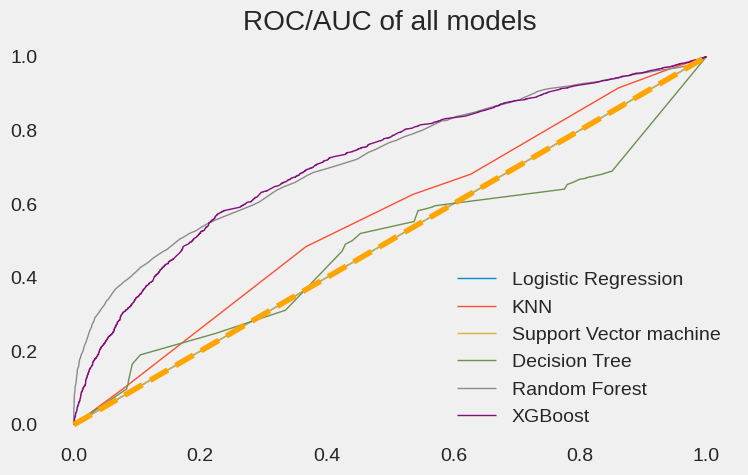

In [ ]:
# Plot ROC_AUC curve of 6 models
from sklearn.metrics import roc_curve

fig,ax = plt.subplots(figsize=(8, 5))

y_pred_proba = lr_optimal.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, lw=1, label='Logistic Regression')

y_pred_proba = knn_optimal.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr ,lw=1, label='KNN')

y_pred_proba = svc_optimal.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr ,lw=1, label='Support Vector machine')

y_pred_proba = dt_optimal.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, lw=1, label='Decision Tree')

y_pred_proba = rf_optimal.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, lw=1, label='Random Forest')

y_pred_proba = xgb_optimal.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, lw=1, label='XGBoost')

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.title('ROC/AUC of all models')
plt.legend()
plt.grid()

#### **7.7.3 Model explainability**

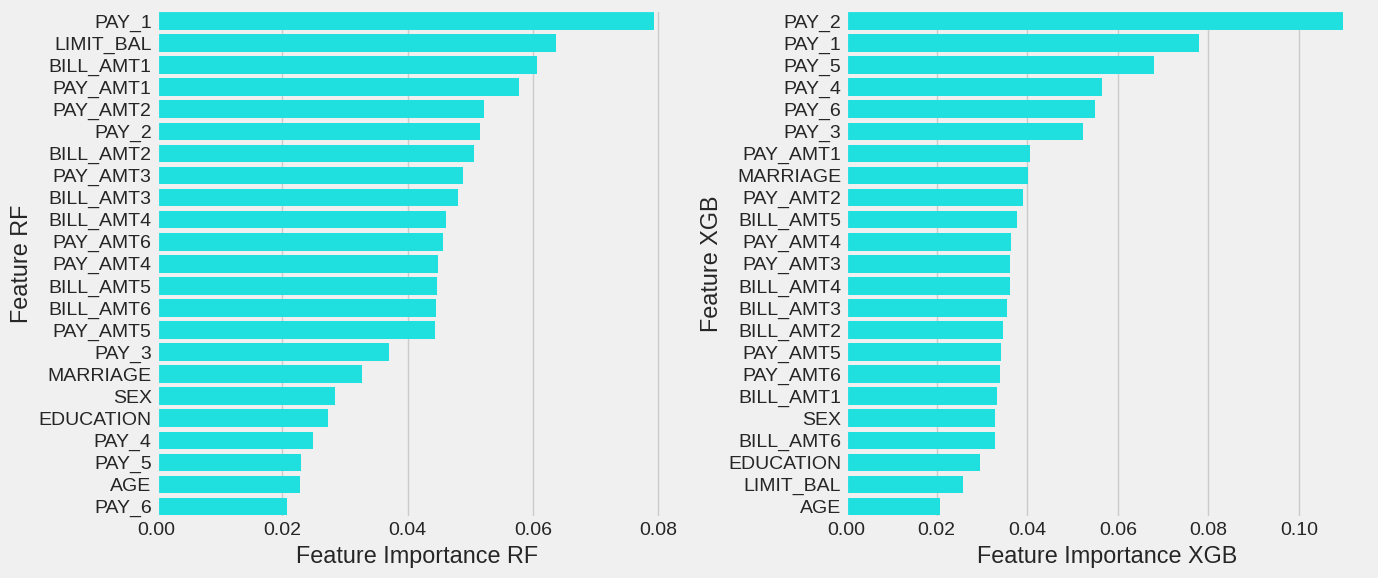

In [ ]:
# feature importance (Random Forest)
rf_importances = rf_optimal.feature_importances_

#Creating a dictonary
rf_importance_dict = {'Feature RF' : list(X.columns),
                   'Feature Importance RF' : rf_importances}

#Creating the dataframe
rf_importance = pd.DataFrame(rf_importance_dict)
rf_sorting_features = rf_importance.sort_values(by=['Feature Importance RF'],ascending=False)

# feature importance (XGB)
xgb_importances = xgb_optimal.feature_importances_

#Creating a dictonary
xgb_importance_dict = {'Feature XGB' : list(X.columns),
                   'Feature Importance XGB' : xgb_importances}

#Creating the dataframe
xgb_importance = pd.DataFrame(xgb_importance_dict)
xgb_sorting_features = xgb_importance.sort_values(by=['Feature Importance XGB'],ascending=False)

# plotting feature importance graph
fig,ax = plt.subplots(1,2, figsize=(14,6))
bar = sns.barplot(x='Feature Importance RF', y='Feature RF', data = rf_sorting_features, color='cyan', ax=ax[0])
bar = sns.barplot(x='Feature Importance XGB', y='Feature XGB', data = xgb_sorting_features, color='cyan', ax=ax[1])

plt.tight_layout()
plt.show()

- In the **Random Forest Classifier**, Pay_1, LIMIT_BAL, and BILL_AMT_1 emerge as the most significant features, while PAY_6, AGE, and EDUCATION are deemed less influential.

- On the other hand, the **XGBoost Classifier** assigns the utmost importance to PAY_2/1/5, whereas AGE, LIMIT_BAL, EDUCATION, and SEX are considered the least significant features according to this model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?


**ROC_AUC Score and Recall** has been used as evaluation metrics. They are considered good evaluation metrics for credit card default prediction for the following reasons:
1. Prioritizing False Negatives: In credit card default prediction, missing a true defaulter (false negative) can have significant financial implications for the business. Recall is a measure of a model's ability to minimize false negatives, ensuring that actual defaulters are not overlooked.
2. ROC-AUC for Model Discrimination: ROC-AUC assesses a model's ability to distinguish between positive (default) and negative (non-default) cases across different probability thresholds. A high ROC-AUC value indicates that the model can effectively separate the two classes, making it a valuable metric for credit card default prediction. It helps in identifying the optimal threshold for balancing true positives and false positives.
3. Comparative Analysis: ROC-AUC enables easy comparison of different models or versions of models. It helps businesses select the model with the best overall performance, especially when considering both sensitivity (recall) and specificity (1 - false positive rate).

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

#### **The chosen model for predicting the outcome is KNN**.

While Random Forest and XGB produced promising results, they exhibited signs of overfitting and were thus excluded from consideration. Following the elimination of these models, KNN consistently delivered the best results, making it the most suitable choice. KNN has proven to be the optimal model, displaying strong performance in terms of ROC_AUC and recall.

# **8. Conclusion**

#### **Key Insights and Takeaways from Credit Card Default Prediction Models**

Following the evaluation of several models in our classification project, we observed the highest accuracy achieved by the Support Vector Classifier (SVC) and K-Nearest Neighbors (KNN).

Conversely, Random Forest and XGBoost exhibited overfitting behavior.

In comparison to the other models we tested, Decision Tree yielded the lowest level of accuracy.

We have the option to deploy this model as a valuable tool to assist in human decision-making processes.

Enhancements to the model are attainable with additional data and increased computational resources.

#### **Significance of Credit Card Default Prediction in Business Success**


Credit card default prediction is a classification project that assists businesses in various ways by forecasting whether a user will default on payments or not.

- **Lending Decisions:** Credit card default prediction models inform banks' lending decisions by evaluating customer credit history and transactions, aiding in approving cards for low-risk customers and setting suitable credit limits.

- **Risk Management:** These models help banks effectively manage credit risk by early identification of high-risk customers, enabling measures like credit limits and repayment plans to prevent defaults.

- **Fraud Detection:** Credit card default prediction models also assist in fraud detection, differentiating legitimate from potentially fraudulent transactions by spotting deviations from a customer's typical behavior, aiding in fraud prevention.